## Data Gathering & Extraction (Most Popular Movie in Action Genre)

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

# Base URL for the AJAX requests to load more reviews
base_url = "https://www.imdb.com/title/tt12637874/reviews/_ajax"

# Headers to mimic a browser request
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}

# Initialize empty lists to store data from web scraping
review_titles = []
review_contents = []
ratings = []

# Function to extract reviews from the current page
def extract_reviews(soup):
    review_data = soup.find_all('div', {"class": "review-container"})
    for row in review_data:
        # Extract review title data
        review_title_element = row.find("a", {"class": "title"})
        if review_title_element:
            review_titles.append(review_title_element.text.strip())

        # Extract review content data
        review_content_element = row.find("div", {"class": "text show-more__control"})
        if review_content_element:
            review_contents.append(review_content_element.text.strip())
        
        # Extract rating score (assuming the structure is consistent)
        rating_element = row.find("span", class_="rating-other-user-rating")  # Target the relevant element
        if rating_element:
            score_element = rating_element.find("span", string=lambda text: text and text.isdigit())
            if score_element:
                ratings.append(score_element.text.strip())
            else:
                ratings.append(None)  # Append None if rating not found within the element
        else:
            ratings.append(None)  # Append None if the entire rating element is not found


# Initial request to get the first page
response = requests.get(base_url, headers=headers, timeout=10)
soup = BeautifulSoup(response.text, "html.parser")
extract_reviews(soup)

# Find the pagination key for the next page
load_more_data = soup.find("div", {"class": "load-more-data"})
pagination_key = load_more_data["data-key"] if load_more_data else None

# Loop through subsequent pages until there are no more pages
while pagination_key:
    try:
        response = requests.get(base_url, headers=headers, params={"paginationKey": pagination_key}, timeout=10)
        soup = BeautifulSoup(response.text, "html.parser")
        extract_reviews(soup)
        load_more_data = soup.find("div", {"class": "load-more-data"})
        pagination_key = load_more_data["data-key"] if load_more_data else None
        time.sleep(3)  # Adding a delay to avoid overwhelming the server
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")
        time.sleep(5)  # Wait before retrying
        continue

# Create the DataFrame
df = pd.DataFrame({'Title': review_titles, 'Review': review_contents, 'Rating Score': ratings,})

# Specify the filename
file_name = 'action_imdb_reviews.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_name, index=False)  # Avoid including the index column

print("DataFrame saved to", file_name)


DataFrame saved to action_imdb_reviews.csv


# 1. Data Cleaning (Text Preprocessing)

In [85]:
import pandas as pd

#read CSV into DataFrame
df = pd.read_csv("action_imdb_reviews.csv")
df

,Title,Review,Rating Score
0,Never played the games so I can't compare,I never played the Fallout games or knew anyth...,9.0
1,I am in love with this show,THIS is how you make a video game to movie/tv ...,9.0
2,Better Than Expected,Fallout is even better than I expected. It's u...,9.0
3,Probably the best gaming adaptation ever,Fallout franchise had a few shifts in the lore...,10.0
4,we want more Fallout,I was afraid this show will be weak or average...,10.0
...,...,...,...
1037,only played the original game for a couple of ...,"I understand people loved the game, I gave it ...",4.0
1038,Violent and disgusting,Disgusting use of extreme graphic violence tha...,3.0
1039,Amazon does it again,Another attempt by the cash-guzzling giant to ...,2.0
1040,"Great world building, interesting story with s...","I have never played the game, so my review is ...",5.0


### Basic Text Preprocessing

In [86]:
df = df[['Title', 'Review', 'Rating Score']]
display(df)

,Title,Review,Rating Score
0,Never played the games so I can't compare,I never played the Fallout games or knew anyth...,9.0
1,I am in love with this show,THIS is how you make a video game to movie/tv ...,9.0
2,Better Than Expected,Fallout is even better than I expected. It's u...,9.0
3,Probably the best gaming adaptation ever,Fallout franchise had a few shifts in the lore...,10.0
4,we want more Fallout,I was afraid this show will be weak or average...,10.0
...,...,...,...
1037,only played the original game for a couple of ...,"I understand people loved the game, I gave it ...",4.0
1038,Violent and disgusting,Disgusting use of extreme graphic violence tha...,3.0
1039,Amazon does it again,Another attempt by the cash-guzzling giant to ...,2.0
1040,"Great world building, interesting story with s...","I have never played the game, so my review is ...",5.0


### Remove Punctuation

In [87]:
#import string module for string manipulation
import string

#The constant in string module to remove punctuations
string.punctuation

#defining the function to remove punctuations in the documents
def remove_punctuation(Text):
    #punctuationfree = "".join([i for i in text if i not in string.punctuation])
    #return punctuationfree
    # Initialize an empty string to store the result
    punctuation_free = ""
    
    # Iterate over each character in the text
    for i in Text:
        # Check if the character is not in the string.punctuation set
        if i not in string.punctuation:
            # If not, add the character to the result string
            punctuation_free += i
    
    return punctuation_free

In [88]:
# Convert non-string values to strings in 'Text' column
df['Review'] = df['Review'].astype(str)

# Apply remove_punctuation function to 'Text' column and store result in 'clean_text' column
df['clean_punc_review'] = df['Review'].apply(remove_punctuation)

# Display the resulting DataFrame
df

,Title,Review,Rating Score,clean_punc_review
0,Never played the games so I can't compare,I never played the Fallout games or knew anyth...,9.0,I never played the Fallout games or knew anyth...
1,I am in love with this show,THIS is how you make a video game to movie/tv ...,9.0,THIS is how you make a video game to movietv s...
2,Better Than Expected,Fallout is even better than I expected. It's u...,9.0,Fallout is even better than I expected Its up ...
3,Probably the best gaming adaptation ever,Fallout franchise had a few shifts in the lore...,10.0,Fallout franchise had a few shifts in the lore...
4,we want more Fallout,I was afraid this show will be weak or average...,10.0,I was afraid this show will be weak or average...
...,...,...,...,...
1037,only played the original game for a couple of ...,"I understand people loved the game, I gave it ...",4.0,I understand people loved the game I gave it a...
1038,Violent and disgusting,Disgusting use of extreme graphic violence tha...,3.0,Disgusting use of extreme graphic violence tha...
1039,Amazon does it again,Another attempt by the cash-guzzling giant to ...,2.0,Another attempt by the cashguzzling giant to c...
1040,"Great world building, interesting story with s...","I have never played the game, so my review is ...",5.0,I have never played the game so my review is b...


### Convert Text into Lowercase

In [89]:
#to standardize the cases in the documents into lower case
df['clean_lower']= df['clean_punc_review'].str.lower()
df

,Title,Review,Rating Score,clean_punc_review,clean_lower
0,Never played the games so I can't compare,I never played the Fallout games or knew anyth...,9.0,I never played the Fallout games or knew anyth...,i never played the fallout games or knew anyth...
1,I am in love with this show,THIS is how you make a video game to movie/tv ...,9.0,THIS is how you make a video game to movietv s...,this is how you make a video game to movietv s...
2,Better Than Expected,Fallout is even better than I expected. It's u...,9.0,Fallout is even better than I expected Its up ...,fallout is even better than i expected its up ...
3,Probably the best gaming adaptation ever,Fallout franchise had a few shifts in the lore...,10.0,Fallout franchise had a few shifts in the lore...,fallout franchise had a few shifts in the lore...
4,we want more Fallout,I was afraid this show will be weak or average...,10.0,I was afraid this show will be weak or average...,i was afraid this show will be weak or average...
...,...,...,...,...,...
1037,only played the original game for a couple of ...,"I understand people loved the game, I gave it ...",4.0,I understand people loved the game I gave it a...,i understand people loved the game i gave it a...
1038,Violent and disgusting,Disgusting use of extreme graphic violence tha...,3.0,Disgusting use of extreme graphic violence tha...,disgusting use of extreme graphic violence tha...
1039,Amazon does it again,Another attempt by the cash-guzzling giant to ...,2.0,Another attempt by the cashguzzling giant to c...,another attempt by the cashguzzling giant to c...
1040,"Great world building, interesting story with s...","I have never played the game, so my review is ...",5.0,I have never played the game so my review is b...,i have never played the game so my review is b...


### Remove Digits and Hypens

In [90]:
#import regular expression library
import re

#function to remove digit (\d) or hypens (-) from the documents with an empty string ''
def remove_numbers(Text):
    return re.sub("[\d-]",'',Text)

#applying the remove_numbers function to the 'clean_lower' column and storing the result in a new column 'clean_number'
df['clean_number'] = df['clean_lower'].apply(remove_numbers)
df

,Title,Review,Rating Score,clean_punc_review,clean_lower,clean_number
0,Never played the games so I can't compare,I never played the Fallout games or knew anyth...,9.0,I never played the Fallout games or knew anyth...,i never played the fallout games or knew anyth...,i never played the fallout games or knew anyth...
1,I am in love with this show,THIS is how you make a video game to movie/tv ...,9.0,THIS is how you make a video game to movietv s...,this is how you make a video game to movietv s...,this is how you make a video game to movietv s...
2,Better Than Expected,Fallout is even better than I expected. It's u...,9.0,Fallout is even better than I expected Its up ...,fallout is even better than i expected its up ...,fallout is even better than i expected its up ...
3,Probably the best gaming adaptation ever,Fallout franchise had a few shifts in the lore...,10.0,Fallout franchise had a few shifts in the lore...,fallout franchise had a few shifts in the lore...,fallout franchise had a few shifts in the lore...
4,we want more Fallout,I was afraid this show will be weak or average...,10.0,I was afraid this show will be weak or average...,i was afraid this show will be weak or average...,i was afraid this show will be weak or average...
...,...,...,...,...,...,...
1037,only played the original game for a couple of ...,"I understand people loved the game, I gave it ...",4.0,I understand people loved the game I gave it a...,i understand people loved the game i gave it a...,i understand people loved the game i gave it a...
1038,Violent and disgusting,Disgusting use of extreme graphic violence tha...,3.0,Disgusting use of extreme graphic violence tha...,disgusting use of extreme graphic violence tha...,disgusting use of extreme graphic violence tha...
1039,Amazon does it again,Another attempt by the cash-guzzling giant to ...,2.0,Another attempt by the cashguzzling giant to c...,another attempt by the cashguzzling giant to c...,another attempt by the cashguzzling giant to c...
1040,"Great world building, interesting story with s...","I have never played the game, so my review is ...",5.0,I have never played the game so my review is b...,i have never played the game so my review is b...,i have never played the game so my review is b...


### Remove Unwanted Characters

In [91]:
# Function to remove unwanted characters
def remove_unwanted_chars(text):
    # Define your set of unwanted characters here
    unwanted_chars = ['!', '@', '#', '$', '%', '^', '&', '*', '"', '(', ')', '_', '+', '=', '[', ']', '{', '}', ';', ':', '<', '>', ',', '.', '/', '?', '\\', '|']
    # Replace unwanted characters with an empty string
    for char in unwanted_chars:
        text = text.replace(char, '')
    return text

# Applying the remove_unwanted_chars function to the 'clean_html' column and storing the result in a new column 'clean_final'
df['Text'] = df['clean_number'].apply(remove_unwanted_chars)
df

,Title,Review,Rating Score,clean_punc_review,clean_lower,clean_number,Text
0,Never played the games so I can't compare,I never played the Fallout games or knew anyth...,9.0,I never played the Fallout games or knew anyth...,i never played the fallout games or knew anyth...,i never played the fallout games or knew anyth...,i never played the fallout games or knew anyth...
1,I am in love with this show,THIS is how you make a video game to movie/tv ...,9.0,THIS is how you make a video game to movietv s...,this is how you make a video game to movietv s...,this is how you make a video game to movietv s...,this is how you make a video game to movietv s...
2,Better Than Expected,Fallout is even better than I expected. It's u...,9.0,Fallout is even better than I expected Its up ...,fallout is even better than i expected its up ...,fallout is even better than i expected its up ...,fallout is even better than i expected its up ...
3,Probably the best gaming adaptation ever,Fallout franchise had a few shifts in the lore...,10.0,Fallout franchise had a few shifts in the lore...,fallout franchise had a few shifts in the lore...,fallout franchise had a few shifts in the lore...,fallout franchise had a few shifts in the lore...
4,we want more Fallout,I was afraid this show will be weak or average...,10.0,I was afraid this show will be weak or average...,i was afraid this show will be weak or average...,i was afraid this show will be weak or average...,i was afraid this show will be weak or average...
...,...,...,...,...,...,...,...
1037,only played the original game for a couple of ...,"I understand people loved the game, I gave it ...",4.0,I understand people loved the game I gave it a...,i understand people loved the game i gave it a...,i understand people loved the game i gave it a...,i understand people loved the game i gave it a...
1038,Violent and disgusting,Disgusting use of extreme graphic violence tha...,3.0,Disgusting use of extreme graphic violence tha...,disgusting use of extreme graphic violence tha...,disgusting use of extreme graphic violence tha...,disgusting use of extreme graphic violence tha...
1039,Amazon does it again,Another attempt by the cash-guzzling giant to ...,2.0,Another attempt by the cashguzzling giant to c...,another attempt by the cashguzzling giant to c...,another attempt by the cashguzzling giant to c...,another attempt by the cashguzzling giant to c...
1040,"Great world building, interesting story with s...","I have never played the game, so my review is ...",5.0,I have never played the game so my review is b...,i have never played the game so my review is b...,i have never played the game so my review is b...,i have never played the game so my review is b...


### Check Duplicates of Records

In [92]:
# check no. of duplicates in clean_number column
df_t_duplicates = df.duplicated()
print(df_t_duplicates.sum())

0


In [93]:
# Save the last column 'clean_final' to a new CSV file
df[['Text']].to_csv('clean_ActionText.csv', index=False)

### Data Tokenization

In [94]:
df = df[['Rating Score', 'Text']]
df


,Rating Score,Text
0,9.0,i never played the fallout games or knew anyth...
1,9.0,this is how you make a video game to movietv s...
2,9.0,fallout is even better than i expected its up ...
3,10.0,fallout franchise had a few shifts in the lore...
4,10.0,i was afraid this show will be weak or average...
...,...,...
1037,4.0,i understand people loved the game i gave it a...
1038,3.0,disgusting use of extreme graphic violence tha...
1039,2.0,another attempt by the cashguzzling giant to c...
1040,5.0,i have never played the game so my review is b...


In [95]:
#import Natural Language Processing (NLP) library called 
#Natural Language Toolkit (NLTK)
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [96]:
import nltk
from nltk.tokenize import word_tokenize

# Assuming 'data' is a DataFrame with a 'clean_final' column and 'clean_final' is a Series
#data['token_data'] = data['clean_final'].apply(word_tokenize)

# Tokenize the text into individual words
df['token_data'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))

C:\Users\User\AppData\Local\Temp\ipykernel_5988\1682435237.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['token_data'] = df['Text'].apply(lambda x: nltk.word_tokenize(x))


### Stopwords Removal 

In [97]:
#download stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
#Get the list of English stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

# Print the list of stopwords
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [99]:
#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output = []
    for i in text:
        if i not in stopwords:
            output.append(i)
    return output

#Applying the remove_stopwords function to the 'token_data' column and storing the result in a new column 'clean_xstopwords'
df['clean_xstopwords'] = df['token_data'].apply(remove_stopwords)
df

C:\Users\User\AppData\Local\Temp\ipykernel_5988\2550349008.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_xstopwords'] = df['token_data'].apply(remove_stopwords)


,Rating Score,Text,token_data,clean_xstopwords
0,9.0,i never played the fallout games or knew anyth...,"[i, never, played, the, fallout, games, or, kn...","[never, played, fallout, games, knew, anything..."
1,9.0,this is how you make a video game to movietv s...,"[this, is, how, you, make, a, video, game, to,...","[make, video, game, movietv, show, series, pan..."
2,9.0,fallout is even better than i expected its up ...,"[fallout, is, even, better, than, i, expected,...","[fallout, even, better, expected, one, best, v..."
3,10.0,fallout franchise had a few shifts in the lore...,"[fallout, franchise, had, a, few, shifts, in, ...","[fallout, franchise, shifts, lore, perception,..."
4,10.0,i was afraid this show will be weak or average...,"[i, was, afraid, this, show, will, be, weak, o...","[afraid, show, weak, average, simply, awesomee..."
...,...,...,...,...
1037,4.0,i understand people loved the game i gave it a...,"[i, understand, people, loved, the, game, i, g...","[understand, people, loved, game, gave, couple..."
1038,3.0,disgusting use of extreme graphic violence tha...,"[disgusting, use, of, extreme, graphic, violen...","[disgusting, use, extreme, graphic, violence, ..."
1039,2.0,another attempt by the cashguzzling giant to c...,"[another, attempt, by, the, cashguzzling, gian...","[another, attempt, cashguzzling, giant, comple..."
1040,5.0,i have never played the game so my review is b...,"[i, have, never, played, the, game, so, my, re...","[never, played, game, review, based, tv, show,..."


### Lemmatization

In [100]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet lemmatizer
nltk.download('wordnet')

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [101]:
# Lemmatize the tokens
df['Tokens'] = df['clean_xstopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

C:\Users\User\AppData\Local\Temp\ipykernel_5988\3942466141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tokens'] = df['clean_xstopwords'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [102]:
# Join the tokens back into sentences
df['Preprocessed_Text'] = df['Tokens'].apply(lambda x: ' '.join(x))

# Save the preprocessed data to a new CSV file
df.to_csv('preprocessed_action_reviews.csv', index=False)

# Preview the preprocessed data
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_5988\1394963428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Preprocessed_Text'] = df['Tokens'].apply(lambda x: ' '.join(x))


,Rating Score,Text,token_data,clean_xstopwords,Tokens,Preprocessed_Text
0,9.0,i never played the fallout games or knew anyth...,"[i, never, played, the, fallout, games, or, kn...","[never, played, fallout, games, knew, anything...","[never, played, fallout, game, knew, anything,...",never played fallout game knew anything idea e...
1,9.0,this is how you make a video game to movietv s...,"[this, is, how, you, make, a, video, game, to,...","[make, video, game, movietv, show, series, pan...","[make, video, game, movietv, show, series, pan...",make video game movietv show series pander gam...
2,9.0,fallout is even better than i expected its up ...,"[fallout, is, even, better, than, i, expected,...","[fallout, even, better, expected, one, best, v...","[fallout, even, better, expected, one, best, v...",fallout even better expected one best video ga...
3,10.0,fallout franchise had a few shifts in the lore...,"[fallout, franchise, had, a, few, shifts, in, ...","[fallout, franchise, shifts, lore, perception,...","[fallout, franchise, shift, lore, perception, ...",fallout franchise shift lore perception result...
4,10.0,i was afraid this show will be weak or average...,"[i, was, afraid, this, show, will, be, weak, o...","[afraid, show, weak, average, simply, awesomee...","[afraid, show, weak, average, simply, awesomee...",afraid show weak average simply awesomeeveryth...


# 2. Feature Extraction (Bag Of Words AND TF-IDF)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Bag of Words

In [104]:
# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the preprocessed text data
bow_features = vectorizer.fit_transform(df['Preprocessed_Text'])

# Get the vocabulary (unique words)
vocabulary = vectorizer.get_feature_names_out()

# Print the shape of the BoW features and the vocabulary size
print("BoW feature shape:", bow_features.shape)
print("Vocabulary size:", len(vocabulary))

BoW feature shape: (1042, 12781)
Vocabulary size: 12781


In [105]:
from collections import Counter

# Given list of sentences
sentences = [
    "fallout game always amazing lore game design person tend naturally check review watching show see consistent star rotten tomato joke perhaps collective prank like morbius honestly dont knowspoilers episode belowthe acting awful awful script actor read dont even help quite literally worse dialogue ive listen understand concept vault dweller naive naive quite literally stupid huge lack survival instinct point maybe little genetic diversity due cousin canonically made cognitively impaired lucy ignorance unbearable giving water bottle complete stranger surface look like would rob everything way past simply naive shes idiot dialogue ghoul cringeworthy ready turn show right realised maybe lucy stupidity may satiricalgoing back episode raider killing people vault exception vault dweller putting effort stopping majority absolutely nothing sense urgency lack security mean fighting two people still carrying food tray casually oblivious shooting gun screaming something heard even lucy way room door lockedmaximushonestly like show want hate character someone even little screen time annoying scene cult leader interrogation hard watch he even interesting he likeable he probably cried he spoken he terrible knight talking knight guy power armour obviously shown intimidatingstrong trusted fighter brother steel yet one come contact mutated bear resorted act dead approach rely squire pistol take pay mind knight saying shoot something right dropping helicopter early complete embarrassment whats stupid maximus going stim didnt die knight power amour saw opportunity absolute incinerate maximus reason despite maximus one decide survival one saved first place thought guy underwent vigorous training even education yet chosen knight share singular brain cell apparentlythis show awful acting awful dialogue awful really dont care lucy maximus honest equally unlikeable really dont understand review show high considering terribly nonengaging plot awful creation charactersdont watch worth time",
    "really really wish could given actor great part decoration setting mostly hit right spot everything else fall flatfrom perspective longtime fallout fan cant count good adaptation west coast lore retconned hell back la giant successful city angel boneyard anymore shady sand though wait isnt nuked end ncr lack ncr presence seems indicate though survivor squatting griffith observatory ncr city around new reno san francisco hub presumably place angel boneyard gone lore make place dumb fun mad max settingthe retconning go faction west coast brotherhood last leg nope metal airship gigantic base well enough military might conquer nearby shantytown reason dont get started enclave wiped long ago ncr persecution former member scientifically advanced big facility somewhere unlimited power source zero way getting since belonged vault tec also kept activation code manage get newest mcguffin code idea maybe thats dont know accidentally skipped scene thats explained please let knowbut even arent huge lore nerd like inconsistency plot hole still drive nut already mentioned whole enclave fiasco thing simply introduced reason explained anywhere except maybe maybe potential season moldaver alive year strongly implied lucy mother first leave vault otherwise shady sand would nuked way earlier cryo ghoulification reason still look almost exactly skeleton invincibility serum thaddeus get cause sure hell didnt make ghoul maximus said ghoul cant take arrow neck random guy danger earlier vaccine injury many question answersthe smaller inconsistency little le face still noticeable power armor crush skull bring building throw brick near bullet speed inconvenient plot titus fighting yao guai maximus fighting ghoul brotherhood assault ncr remnant barely give edge except titus impediment snipsnip sew finger onto lucy going harvested organ anyway vault find maximus power armor left far beyond bridge ghoul shoot enclave scientist leg wanted get live bounty give life threatening injury make way harder move wanted dead aim leg enclave guy ever get base hell maximus know people vault everyone surface seems know reason hate vault dweller inconsistency small hand waved away first couple time becomes increasingly harder suspend one disbelief let slide lazy writing plain simpleonce truly wish could give higher number high hope good review friend recommendation unfortunately realized loved lucy though often understand maximus moment norm also solid id say vault story engaging though tad bit spoiled knowledge vault experiment fallout player cause never doubt something shifty give show one lucy character surviving writing thanks small part actress norm two decoration set please improve nd season dont mess new vega",
    "series reviewing well nostalgia gamers really love game tough separate twothe show shallow hollow walton goggins best part show writing horrible vault dweller ultra naive assume awkward sense superiority show super contrived main character get finger cut replaced dead finger work nothing ever happened main brotherhood lacky somehow never get caught everything wrong even chance something amazing blow itaside first two episode pretty boring show people really low expectation",
    "never played game basic premise protagonist start underground fallout shelter called vault various circumstance forced surface struggle survivethis show get part right via poorly written story coherent thought process behind sure there general plot followed episode unfortunately writer dont seem want actually tell good story want set individual scene loosely tied together dont even get started plethora plot hole inconsistencieson positive note show good enough job capturing look feel fallout world however seem populate world enemy monster would find game give ghoul radroaches actual fallout world teeming well abundance nasties dealt withoverall disappointed title say expected greatness got mediocrity",
    "knowing history videogame adaptation really expected worst adding could quite harsh critic loving game dobut honestly exceeded expectation funny gory exciting epic feel like perfect mixture falloutexperts newcomer came sit table make good adaptation everyone enjoy even game got good reaclaimed boost confirms series succesevery character got down feeling quite threedimensional real hero even though lucycharacter embarks traditionel hero journey knowing dark crazy twisted world fallout apocalpye doesnt allow nice guynevertheless say walton goggins depiction ghoul carried show many point couldnt get enough character loved every scene cant wait see next season",
    "close hour fallout new vega bit shy total fallout little nervous watching series many disappointment many game related movie tv show past pleasantly surprised fallout series enjoyed episodesthough others complained atmosphere found believable california southern coastline arent going get urban sprawl downtown washington c going get bleached desert new vega instead get lot beach sand blown inland nuclear explosion covering ruin l surrounding area series stay away lot dungeon crawling wandering wreck building actually make small part gaming environment nice job portraying vault really loved depiction brotherhood steel little harsh least taste never encountered quite harsh either fallout new vega chapter could different depending circumstance surrounding able accept thatthe genius series casting walton goggins cooper howard spectacular part rest cast pretty good tv show nobody really stood ella purnell good lead character great much tendency overact cheesy vault girl part aaron moten never really convinced character episode seemed bewildered weak moises aria good small scene rest case ok neither adding subtracting much storyall though found series fun ride hope keep second season",
]
    
# Step 1: List all unique words
all_words = ' '.join(sentences).split()
unique_words = list(set(all_words))

# Step 2: Create word frequency table
word_freq = Counter(all_words)
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

# Step 3: Create document vectors
document_vectors = []
for sentence in sentences:
    sentence_words = sentence.split()
    document_vector = [1 if word in sentence_words else 0 for word in sorted_word_freq.keys()]
    document_vectors.append(document_vector)

# Print the results
print("Step 1: List of Unique Words:", unique_words)
print("\nStep 2: Word Frequency Table:")
print("Word\tFrequency")
for word, freq in sorted_word_freq.items():
    print(f"{word}\t{freq}")

print("\nStep 3: Document Vectors:")
for sentence, vector in zip(sentences, document_vectors):
    print(f"Sentence: {sentence}\nVector: {vector}\n")

Step 1: List of Unique Words: ['getting', 'player', 'fighter', 'doesnt', 'knowing', 'terribly', 'exception', 'watch', 'skipped', 'interrogation', 'last', 'stim', 'taste', 'part', 'casting', 'coastline', 'character', 'survival', 'shes', 'random', 'say', 'shantytown', 'alive', 'slide', 'assault', 'various', 'lacky', 'c', 'threedimensional', 'spot', 'canonically', 'covering', 'guy', 'thatthe', 'impediment', 'amazing', 'around', 'manage', 'harvested', 'replaced', 'come', 'answersthe', 'dweller', 'episodesthough', 'rest', 'finger', 'videogame', 'water', 'wish', 'protagonist', 'count', 'unfortunately', 'table', 'walton', 'armour', 'surprised', 'oblivious', 'second', 'realised', 'lucy', 'former', 'season', 'california', 'explosion', 'pay', 'cult', 'end', 'bleached', 'ella', 'military', 'positive', 'cognitively', 'big', 'plethora', 'disappointed', 'tec', 'smaller', 'dropping', 'building', 'disappointment', 'hate', 'back', 'awful', 'boost', 'idea', 'knowledge', 'morbius', 'spoken', 'observatory

### TF-IDF

In [106]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the preprocessed text data
tfidf_features = tfidf_vectorizer.fit_transform(df['Preprocessed_Text'])

# Get the vocabulary (unique words)
tfidf_vocabulary = tfidf_vectorizer.get_feature_names_out()

# Print the shape of the TF-IDF features and the vocabulary size
print("TF-IDF feature shape:", tfidf_features.shape)
print("Vocabulary size:", len(tfidf_vocabulary))

TF-IDF feature shape: (1042, 12781)
Vocabulary size: 12781


In [107]:
import math
from collections import Counter

def compute_tf(document):
    word_count = Counter(document)
    tf = {word: count/len(document) for word, count in word_count.items()}
    return tf

def compute_idf(documents):
    N = len(documents)
    idf = {}
    all_words = set(word for doc in documents for word in doc)
    for word in all_words:
        count = sum(1 for doc in documents if word in doc)
        idf[word] = math.log(N/count)
    return idf

def compute_tfidf(document, idf):
    tfidf = {}
    tf = compute_tf(document)
    for word, tf_value in tf.items():
        tfidf[word] = tf_value * idf[word]
    return tfidf

# New data
tf_idf = [
    "fallout game always amazing lore game design person tend naturally check review watching show see consistent star rotten tomato joke perhaps collective prank like morbius honestly dont knowspoilers episode belowthe acting awful awful script actor read dont even help quite literally worse dialogue ive listen understand concept vault dweller naive naive quite literally stupid huge lack survival instinct point maybe little genetic diversity due cousin canonically made cognitively impaired lucy ignorance unbearable giving water bottle complete stranger surface look like would rob everything way past simply naive shes idiot dialogue ghoul cringeworthy ready turn show right realised maybe lucy stupidity may satiricalgoing back episode raider killing people vault exception vault dweller putting effort stopping majority absolutely nothing sense urgency lack security mean fighting two people still carrying food tray casually oblivious shooting gun screaming something heard even lucy way room door lockedmaximushonestly like show want hate character someone even little screen time annoying scene cult leader interrogation hard watch he even interesting he likeable he probably cried he spoken he terrible knight talking knight guy power armour obviously shown intimidatingstrong trusted fighter brother steel yet one come contact mutated bear resorted act dead approach rely squire pistol take pay mind knight saying shoot something right dropping helicopter early complete embarrassment whats stupid maximus going stim didnt die knight power amour saw opportunity absolute incinerate maximus reason despite maximus one decide survival one saved first place thought guy underwent vigorous training even education yet chosen knight share singular brain cell apparentlythis show awful acting awful dialogue awful really dont care lucy maximus honest equally unlikeable really dont understand review show high considering terribly nonengaging plot awful creation charactersdont watch worth time",
    "really really wish could given actor great part decoration setting mostly hit right spot everything else fall flatfrom perspective longtime fallout fan cant count good adaptation west coast lore retconned hell back la giant successful city angel boneyard anymore shady sand though wait isnt nuked end ncr lack ncr presence seems indicate though survivor squatting griffith observatory ncr city around new reno san francisco hub presumably place angel boneyard gone lore make place dumb fun mad max settingthe retconning go faction west coast brotherhood last leg nope metal airship gigantic base well enough military might conquer nearby shantytown reason dont get started enclave wiped long ago ncr persecution former member scientifically advanced big facility somewhere unlimited power source zero way getting since belonged vault tec also kept activation code manage get newest mcguffin code idea maybe thats dont know accidentally skipped scene thats explained please let knowbut even arent huge lore nerd like inconsistency plot hole still drive nut already mentioned whole enclave fiasco thing simply introduced reason explained anywhere except maybe maybe potential season moldaver alive year strongly implied lucy mother first leave vault otherwise shady sand would nuked way earlier cryo ghoulification reason still look almost exactly skeleton invincibility serum thaddeus get cause sure hell didnt make ghoul maximus said ghoul cant take arrow neck random guy danger earlier vaccine injury many question answersthe smaller inconsistency little le face still noticeable power armor crush skull bring building throw brick near bullet speed inconvenient plot titus fighting yao guai maximus fighting ghoul brotherhood assault ncr remnant barely give edge except titus impediment snipsnip sew finger onto lucy going harvested organ anyway vault find maximus power armor left far beyond bridge ghoul shoot enclave scientist leg wanted get live bounty give life threatening injury make way harder move wanted dead aim leg enclave guy ever get base hell maximus know people vault everyone surface seems know reason hate vault dweller inconsistency small hand waved away first couple time becomes increasingly harder suspend one disbelief let slide lazy writing plain simpleonce truly wish could give higher number high hope good review friend recommendation unfortunately realized loved lucy though often understand maximus moment norm also solid id say vault story engaging though tad bit spoiled knowledge vault experiment fallout player cause never doubt something shifty give show one lucy character surviving writing thanks small part actress norm two decoration set please improve nd season dont mess new vega",
    "series reviewing well nostalgia gamers really love game tough separate twothe show shallow hollow walton goggins best part show writing horrible vault dweller ultra naive assume awkward sense superiority show super contrived main character get finger cut replaced dead finger work nothing ever happened main brotherhood lacky somehow never get caught everything wrong even chance something amazing blow itaside first two episode pretty boring show people really low expectation",
    "never played game basic premise protagonist start underground fallout shelter called vault various circumstance forced surface struggle survivethis show get part right via poorly written story coherent thought process behind sure there general plot followed episode unfortunately writer dont seem want actually tell good story want set individual scene loosely tied together dont even get started plethora plot hole inconsistencieson positive note show good enough job capturing look feel fallout world however seem populate world enemy monster would find game give ghoul radroaches actual fallout world teeming well abundance nasties dealt withoverall disappointed title say expected greatness got mediocrity",
    "knowing history videogame adaptation really expected worst adding could quite harsh critic loving game dobut honestly exceeded expectation funny gory exciting epic feel like perfect mixture falloutexperts newcomer came sit table make good adaptation everyone enjoy even game got good reaclaimed boost confirms series succesevery character got down feeling quite threedimensional real hero even though lucycharacter embarks traditionel hero journey knowing dark crazy twisted world fallout apocalpye doesnt allow nice guynevertheless say walton goggins depiction ghoul carried show many point couldnt get enough character loved every scene cant wait see next season",
    "close hour fallout new vega bit shy total fallout little nervous watching series many disappointment many game related movie tv show past pleasantly surprised fallout series enjoyed episodesthough others complained atmosphere found believable california southern coastline arent going get urban sprawl downtown washington c going get bleached desert new vega instead get lot beach sand blown inland nuclear explosion covering ruin l surrounding area series stay away lot dungeon crawling wandering wreck building actually make small part gaming environment nice job portraying vault really loved depiction brotherhood steel little harsh least taste never encountered quite harsh either fallout new vega chapter could different depending circumstance surrounding able accept thatthe genius series casting walton goggins cooper howard spectacular part rest cast pretty good tv show nobody really stood ella purnell good lead character great much tendency overact cheesy vault girl part aaron moten never really convinced character episode seemed bewildered weak moises aria good small scene rest case ok neither adding subtracting much storyall though found series fun ride hope keep second season",
    ]

# Split data into tokens
documents = [doc.split() for doc in tf_idf]

# Compute TF for each document
tf_data = [compute_tf(doc) for doc in documents]

# Create DataFrame for TF
tf_df = pd.DataFrame(tf_data).fillna(0)
print("TF Scores:")
print(tf_df)

# Compute IDF
idf = compute_idf(documents)
idf_df = pd.DataFrame([idf]).fillna(0)
print("\nIDF Scores:")
print(idf_df)

# Compute TF-IDF for each document
tfidf_data = [compute_tfidf(doc, idf) for doc in documents]

# Create DataFrame for TF-IDF
tfidf_df = pd.DataFrame(tfidf_data).fillna(0)
print("\nTF-IDF Scores:")
print(tfidf_df)

TF Scores:
    fallout      game    always   amazing      lore    design    person  \
0  0.003571  0.007143  0.003571  0.003571  0.003571  0.003571  0.003571   
1  0.004926  0.000000  0.000000  0.000000  0.007389  0.000000  0.000000   
2  0.000000  0.014493  0.000000  0.014493  0.000000  0.000000  0.000000   
3  0.030303  0.020202  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.010870  0.021739  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.023256  0.005814  0.000000  0.000000  0.000000  0.000000  0.000000   

       tend  naturally     check  ...    moises      aria      case        ok  \
0  0.003571   0.003571  0.003571  ...  0.000000  0.000000  0.000000  0.000000   
1  0.000000   0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000   0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3  0.000000   0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
4  0.000000   0.000000  0.000000  ...  0.000000  0.000000 

# 3. Model Selection for Movie Review Sentiment Analysis

In [34]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tabulate import tabulate
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

#### Lexicon-Based Approach using NLTK's VADER (Valence Aware Dictionary and Sentimetn Reasoner):

In [35]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Assign sentiment labels based on the 'Score' column
def assign_sentiment(score):
    if score >= 8:
        return 'Positive'
    elif score <= 4:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Rating Score'].apply(assign_sentiment)

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each review
df['Lexicon_Sentiment'] = df['Preprocessed_Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Map sentiment scores to labels
df['Lexicon_Sentiment_Label'] = df['Lexicon_Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Evaluate the lexicon-based approach
lexicon_accuracy = accuracy_score(df['Sentiment'], df['Lexicon_Sentiment_Label'])
print("Lexicon-based Approach Accuracy:", lexicon_accuracy)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...


Lexicon-based Approach Accuracy: 0.7216890595009597


### Generate a sample of data

In [72]:
import pandas as pd
import random

#Assuming your DataFrame is named `data`
#Display the first few rows to verify the structure
df.head()

#Define the number of samples you want
num_samples = 60

#Select a random sample from the DataFrame
sampled_data = df.sample(n=num_samples)

#Format the sample into a list of tuples
formatted_sample = [(row['Preprocessed_Text'], row['Sentiment']) for index, row in sampled_data.iterrows()]

#Print the formatted sample
for item in formatted_sample:
    print(item)


('excellent writing different bit piece connected bring satisfying ending good character development mystery etc honest didnt high expectation felt deep respect game wonderful dramaalso motivation andor situation various character quite complicated definitely wellmade adaption great cast entire cast felt point suitable amount humor right moment gory violent hell intriguing storyline many fun easter egg fan understood assignmenti wasnt fan ending enjoyed overall', 'Positive')
('ive forced watch two episode writing review seriously gone wind like famous dont give da line episode create long lasting screwing chicken im sure go movie history mention demolition man review female character bullock ditzy naive chutzpah underneath exosuits used time b nose guy made think white michael jackson gamers put rating doesnt belong good special effect', 'Negative')
('noseriouslythat wasnt rhetorical questionwhat show must confess managed put three episode atrocity could endure gave since seen anything

In [74]:
data = [ 
    ("excellent writing different bit piece connected bring satisfying ending good character development mystery etc honest didnt high expectation felt deep respect game wonderful dramaalso motivation andor situation various character quite complicated definitely wellmade adaption great cast entire cast felt point suitable amount humor right moment gory violent hell intriguing storyline many fun easter egg fan understood assignmenti wasnt fan ending enjoyed overall", 'Positive'),
    ("ive forced watch two episode writing review seriously gone wind like famous dont give da line episode create long lasting screwing chicken im sure go movie history mention demolition man review female character bullock ditzy naive chutzpah underneath exosuits used time b nose guy made think white michael jackson gamers put rating doesnt belong good special effect", 'Negative'),
    ("noseriouslythat wasnt rhetorical questionwhat show must confess managed put three episode atrocity could endure gave since seen anything bafflingly bad big mess disjointed cacophony passing content imbued drenched modern day ideological trope virtue signaling bereft anything resembling creativity originality importantly qualityi honestly dont care video game personal attachment ip marginally familiar lore approached show newbie prior expectation therefore looking series hoped would least entertaining containing good story interesting character none available quite oppositea waste time brain cell id like say feel iq dropping spend time thinking talking fallout", 'Negative'),
    ("fan fps game optimistic show read game creator involved doesnt disappoint regard capture spirit fallout quite well every aspect visuals prop music humor specially violence really feel like youre watching cutscenes new fallout game disappoints actual story character interesting general plot arc one completely predictable kept interest creative show dont tell moment funny surprise happened rather resolution plot could predict mile away great good show im looking forward season", 'Neutral'),
    ("think series good job telling completly new story without completly adapting original game visuals come pretty close great long time fan bethesda game series dialogje great cast great job putting life animated respective charakters definetly go onan rewatch soon im done writing reviewing one best orginial series year tell hope second seaso announced soon dont try pull te one otherwise would dissapointing", 'Positive'),
    ("want start saying never played video game series brother watching getting input incorporate theme detail character game great like halo series whatever wanted without following classic storyhowever quit watching episode find good grounded character extremely strange relatable lucy closest relatable character hope arrogant obtuse understand postapocalyptic series love last u followed character crappy situation well protagonist fallout bad people making question rooting hoping change greater good also many plot hole dont mean nitpicky example heck would check radiation wedding would robot give lucy finger harvest organ raider running away max crush one head suit many dont understand reasoning behind itanother problem everything sexual problem lucy saying incest cousin could unfortunately somewhat understandable situation would need show guy masturbating boot camp would change story scene also pregnant woman vault cousin dressing husband literally need scene uncomfortable plea weird fan fantasy incestthe ghoul good character written show opinion really disappointed especially hype sorry offended diehard series thought would put however", 'Negative'),
    ("ive reading one star review series felt bad behalf human race felt need write owni loved series long time fallout fan enjoyed every minute firstly attention detail incredible soundtrack random item table eg sugar bomb red rocket gas station pipboy clearly created collaboration fan extremely talented producersthe plot good theyve kept vault back story created one series great dovetail together nicely overall story arc like show pre post war world stitched together following ghoulif criticism would didnt really relate maximus im sure meant feel sorry grow like never really happened find cold cowardly uninspiringlucy hand great watching ongoing realisation world like seeing get progressively tougher without losing pure spirit great balancing act purnell nailed methere much fallout content show also much missing im pleased renewed second season im hoping content theyve hinted throughout series one make appearance also hope dont rush keep incredible attention detail pure fallout vibe given high theyve set bar itll painful ill wait mean make right", 'Positive'),
    ("played game tv adaptation felt like parody vibe akin mar attack stepford wiveswhile game occasionally humour would describe cheeky even dark tv adaptation plain silly immature goofy missing also sometimes scary aspect game well large lengthy action scene raider robot mutated human animal new building location game exciting unpredictable whereas tv series location repetitive scene dull goofythe acting direction actor mostly cartoonish sometimes inconsistently seriousdramatic script immature sexual dialogue feel place overall plot paper thin behaviour character unrealistic illogical relationship development nonexistent unbelievable hero found mission character stand behind root yes treasure sort everyone dont find last episode viewer doesnt know theyre supposed excited seems though main focus writer come plot twist last episode conscious low budget construct plodding filler episode first last pad irrelevant dialogue neglecting build lovable character story arcsconsidering rich world fallout game writer didnt seem care really go deep anything everything feel superficial real credit give production team went beyond faithfully recreate bring life art design game make really fun easter egg hunt shame tv series look like fallout doesnt feel like fallout", 'Negative'),
    ("didnt play game came knowing lore etc gamer reviewer seem havewhile visuals production amazing give real sense world setting im left wondering point admittedly never finished watching full season got ep realised didnt care character stopped maybe depth come second season wont watching find outi get itll appeal familiar franchise feel like majority watch knowing much background itll come across tedious watch", 'Negative'),
    ("fan fallout game yearsi nolow expectation going captured first episode great character twisted dark fallout humor love great cinematography work perfectlythis happens take best ip build upon perfect example make something fan making straight adaptationjonathan nolan worked love franchise amazing skill directing really showsone main writer show worked office u amongst thing think thats humor perfect least meand end shot let goo", 'Positive'),
    ("selfproclaimed og fan series watched one day certainly say deserves canon flaw would fallout didnt acting story visuals lore accuracy fallout feel idea video game adaptation top stay true original also forgetting new onesspoilerswarning ncr fanboys gone reduced atom warning bos fanboys goodytwoshoes like fallout warning vaulttec fanboys big surprise waiting", 'Positive'),
    ("last thing want rate show based something like bad review could mean cancellation star im seeing much disney influence story casting wouldve preferred first vault dweller male funny hey sex sell walter goggins scored one hell become household name playing ghoul many kid watch son justified diamond lol he bringing entertainment screen anyways didnt need another fin star war one good enough like cloned ha story personality another poor cry storm trooper anyways keep show going maybe itll get better season like halo", 'Positive'),
    ("series great watching made want play fallout game specially fallout new vega favorite mine scenery beautiful main character interesting time specially lucy vault dweller script engaging show thing whoever like game also enjoy series main reason wanted watch series jonathan nolan loved project person interest westworld good scifi series creatorsummarizing series worth watch worthy time check", 'Positive'),
    ("played fallout fully vega friend house say show captured fallout perfectly much add show season without overwhelming people already know season better mainly fallout universe lot material work could see super mutant deathclaws far story well done focusing think different character development crazy universe fallout left good space go many different direction season also enjoyed many different emotion took show mixed human element nicely comedy drama action slice life im looking forward season thats make adaptation", 'Positive'),
    ("hope series get another season never play game know bout bit piece lore thank video essay series entertaining well donethe story engaging simple yet amazingly well put violence violent top lot gruesome stuff made look away screen cringe like fit wasteland situation intheres editing error like splicing doesnt make sense put story enjoyed every minute kinda sad finish know next season outi like character lucy nice protagonist started someone quite naive upbringing become survivor without truly losing herselfi love ghoul character though reminded much character westworldi also love music retro aesthethic contrasted apocalypse always something enjoyed see fallout gamesalso big shout best girl doggo cx dogmeat amazing", 'Positive'),
    ("one best video game adaption date top line performance ella purnell hard belief shes two best adaption far absolutely loved arcane killed role great humor fallout like also dare say perfect performance supporting lead walton goggins ghoul tragic story character still come top badass wasteland aaron clifton lucy new brotherhood boyfriend bring much life show im excited season war war never change", 'Positive'),
    ("fallout tv series finally arrived disappoint moment iconic theme play immersed harsh yet strangely captivating wasteland fan franchise know love show masterfully blend dark humor gritty survival story bringing world fallout life way feel fresh faithful rootsthe casting spot actor embodying character unique trait complexity standout performance coupled sharp writing add depth already rich lore fallout universe narrative engaging clever twist intense moment keep edge seat episode explores different aspect wasteland politics various faction personal story survival betrayalvisually series triumph set design special effect authentically recreate retrofuturistic aesthetic game attention detail costume prop add extra layer immersion making feel though youre stepping right gameoverall fallout tv series brilliant adaptation stay true spirit original game introducing element make accessible newcomer whether youre longtime fan newcomer wasteland series mustwatch thrilling ride world despite despair decay always glimmer hope", 'Positive'),
    ("say best adaptation tv show video k ever seen say amazon decides disappointi one tends fall love tv show adaptation game one hit park thrilling fight quirky song nuance always make one come back morethe character building done really well show take character background give snippet past make come back moreover budget tv series one really well cgi costume dont feel fake", 'Positive'),
    ("following big boot last u twisted metal continues tradition amazing adaptation easily digestible fun newcomer alike wife especially know nothing video game fan love adaptation believe sign perfect product brother able geek tiny reference manage stuff every scene wife interested story new exciting location imagery show offer especially love cinematography shot skillfully planned executed thank another great wait find show go", 'Positive'),
    ("fan game think great also think fan tv boxsets treat flaw post apocalyptic usa green tree care good show great character surprised handled ella purnells character wasnt girl bos like show awesome vault dweller used initiative survive like game walton goggins stole show ghoul filli episode awesome bos ok cant wait see series brings vega strip end made want start playing new vega thought great showrunners chose completely different path game good effort solid start series hope stick around long time deathclaws coming", 'Positive'),
    ("tried really tried watched first two episode fell asleep middle one bode well compelling nature showi see theyve spent huge amount money complicated set certainly lavish productionbut never played game mean could see certain element obviously storyboarded right video game npc nature number character clear enough supposed care npc dont know really care character girl naive girl incestuous relation cousin im supposed root cowboy ghostzombie whatever supposed care dont identify character dont care characterslook start theyve bomb shelter long time okay radiation bad okay decide theyre going trade marriage adjacent enclave okay everybody seems geiger counter wrist yet door open adjacent enclave one check mean world filled radiation would think would number one thing open door doesnt seem smart doesnt make anyone enclave seem intelligent make seem like idiot die like idiotsdo think im going identify idiot root sorely mistakenand naive girl decides shes going go alone big bad dont know find lassie father whateveri really dont carewhen watched spiderman tobey maguires character similarly naive also smart made intelligent move made blunder learned character seemed growin show real sense here character character b character b say something character character b leave character go character c say something go girl loses eye necessary plot would story different never lost eye guy loses foot necessary plot story different never lost foot seeing thiscontinuing spiderman comparison peter parker made bad selfish call paid life uncle ben made difference character story see consciously making effort make better choicesi didnt get sense showheres guy he going steal iron man suit another guy cant fly well flying look much like man wire one point cgi slipped actually saw wire little bit wasnt good money spent set im surprised went cheap flying effect robert downey well iron man youre going meet standard dont show flyingtheres difference playing video game watching movie maybe havent noticed friend arent terribly entertained watching play video game making movie essentially watching someone play video game good pathanyhow two episode enough wont backits bad production anything quite lavish term set want character emotion thing identify normal element successful show wont find", 'Negative'),
    ("first heard game going adapted liveaction disappointed news dreading result watching series glad say wrong cant complain really would nitpicking believe show well done could watched anyone never played game dive right get hooked amazing worldi love way film give different perspective world doesnt follow one person point view lead character lucy great representation player play fallout first time due naive innocent beginning true game shes met hard decision evolve character", 'Positive'),
    ("glad didnt go bloodless disney route stayed true game played probably hour fallout even person hour would love love dropped binge weekend yeehawthe costume language weirdness culture many element game brought screen beautifully wish make fallout fear time like truth play game wishing survivor mode okay im filling character get minimum almost enjoy show", 'Positive'),
    ("ever since show announced waiting love bethesda game grew playing skyrim never tried fallout man show amazing start till end tying plot giving every character purpose trio linear story get tied several twist turn ghoul best lucy amazing actor played lucy perfectly executed role lucy reaction several surface stuff shes seeing first time get soo surprised yet shes eager find dad without giving great development regular apprentice soldier sword nd command literal legion army faction called brotherhood steel twist turn leading great finale show past present bomb dropped fallout done could content even tho already entertaining made want dystopian world started playing game enjoying every bit waiting second season cheer", 'Positive'),
    ("experience fallout year playing game fallout new vega game brought franchise set state show california also featured prominently fallout lore wise apocalypse right choice showrunners producer place los angeles california graham wagner geneva robertsondworet served showrunners show penning script episode couple writer deserves praise kieran fitzgerald chaz hawkins gursimran sandhu creator crew behind tv show respected source material game even todd howard aboard producer along jonathan nolan lisa joy nolan directing first three episode thus setting tone whats come like michael mann tokyo vice example notable director clare kilner frederick e toye along wayne yip directed finale people created something truly special perfect would call one best adaptation video game original story set universe something last u halo never writer producer fallout could played safe done something similar would free rein anything wanted without need involving game lore behind truly nailed attention detail set design world building overall production design everything placed scene truly incredible miseenscene director visually fallout spectacular incredible cinematography gorgeous looking visual effect combined practical effect makeup prosthetics ghoul example along set built show like red rocket superduper mart come mind cinematographer worked showseason stuart dryburgh helmed four teodoro maniaci helmed four think dryburghs cinematography best resume piano pilot episode boardwalk empire painted veil speaks hell probably get nominated fallout maniaci also incredible creating iconic shot last two episodesthe show depicts aftermath great war apocalyptic nuclear exchange alternate history earth advance nuclear technology wwii led emergence retrofuturistic society subsequent resource war flashforward tv adaptation follows young woman named lucy leaf behind home vault venture dangerously unforgiving wasteland devastated los angeles look father along way meet brotherhood steel squire ghoul bounty hunter mysterious past agenda settleoriginal fallout lead tim cain appreciated performance storytelling singled show nailed fallout vibe biggest achievement looking prop said one scene realized minute went followed dialogue engrossed visually couldnt agree hearing one creator original fallout game make smile performance storytelling truly highlight comedic tone combined ultraviolence handled perfectly close game show also serious tone important thing everything felt natural never strange viewer eye storytelling overall writing narrative completely right tv show u follow vault dweller perfectly cast three dimensional character right ella purnell lucy maclean squire maximus brotherhood steel also great character well cast played aaron moten walton goggins ghoul cooper howard great three dimensional antagonist cross morally grey multiple occasion thus becoming protagonist right thats big three story deuteragonists also there also big mystery surrounding seasonshow took lucy father destroyed shady sand along howard hunted every faction bounty hunter escaping enclave something valuable meanwhile there another story flashback exactly show ghoul back bomb hit cooper howard timeline wise far anything seen brilliantly executed way didnt hurt pacing made better tie main story stellar main cast character impossible like supporting cast guest star also great name like sarita choudhury leslie uggams matt berry chris parnell michael cristoferthe final episode tie everything together nicely timeline well everything come full circle said episode twist lot knowledge lore lot thing werent shock show big twist unexpected brilliant writer showrunners deserve lot praise last episode whole show faithfulness source material succeeding telling story vast universe would nice would released weekly episode get savor every minute episode day would felt special instead got eight episode honestly happy deep miss whole weekly release socializing come fallout getting second season im stay im giving first season thumb spectacular season television possibly best time ive watching tv series long time multi genre show fallout perfectly nailing genre simply spectacular season television", 'Positive'),
    ("actually incredibly good show good solid storyline keep viewer entertained engaged said really kind hate show movie whole retro future type thing really kind annoys sens im pretty much future futuristic time still show nice enough gore keep people satisfied real world challengesif world post apocalypticpost war kind way writer excellent job telling fallout story actor played theyre part brilliantly cheeky acting role actor done pretty well dark comedy enough gut mayhem good melody jump seat action huge expensive explosionthat like good cinema", 'Positive'),
    ("people leaving negative review thisgood grief must hate everything show fun gory hilarious completely engagingthe character great setting immersive storyline compelling love gave backstory vaulttec character someone really enjoyed playing fallout total treat may bold probably best video game adaptation dateand thats coming someone really loved last ussit back snack cram sugar bomb pop top nuka cola enjoy fun showbravo", 'Positive'),
    ("considering terrible producer regularly crush dream star trek star war fan established intellectual property refreshing see ip ton merit getting produced individual understand jobfallout legendary video game franchise fallout fallout new vega top time video game fallout three like gta iii changed industry gamers provided interactive bliss game one could sink hour remarkable single player experience fallout fallout turn based strategy game established ton lore item idea carried forward fallout third person action game third person action game role playing game strategy game element also incorporated design gamers given ton customization building character aesthetically applied perk ability leveling beauty fallout player could really tailor character ability exactly want included physical ability improved use tool weapon intelligence ability like hacking charisma ability better communication deception single play ability could player pick choose ability round characterthats lot bottom line great game fallout franchise ton merit draw record would say thing monster hunter franchise mh movie god awful train wreck intelligent production come need producer understand take make good television also understand source ip know draw merit ip modern era seems like many producer think take existing ip whatever heck want change fundamental insert outside content nothing original ip worst yet use existing ip float messaging insipid ideasnot fallout fallout producer hired right people let work wonder ever define parameter producer able simply get way let chosen talent job however unfolded end result borderline masterpiecefallout tv show future world never grew style aesthetic mix retro aesthetic science fiction future post apocalyptic wasteland make great playground inject character narrative exactly happens fallout single main character basically three main character story arc arc intersect unfolds across aaa episode second season already authorizedwhile show unfolds easily digested manner story quite complex backstory character im sure many attempted summery recommend watching show one episode probably enough fully commit doubt definitely watch least three complete episode kinda like anime deciding show fallout lot highly stylized violence often humor involved effect really technical quality top notch one better season tv genre last year best got early seasonsif cant tell loved first season fallout also get going ax grind producer selfishly attempt ruin existing intellectual property dubious reason know simple understanding loving video game make good tv producer also understand medium pick choose merit genre make something goodbut great rare gem gamers know bethesda company behind fallout struggling last year video game release last great game fallout even fell short fallout nv opinion fallout came year ago long time great release hope fallout tv show reach mass medium audience provides influx resource interest bethesda need make great video game future even doesnt happen show done right multiple season could greatest thing come publisher astonishing possibility", 'Positive'),
    ("say idea storyline game started watching fallout mainly good review disappoint known many tv show movie made video game lot case pretty bad one really blew mind one best tv show watched time honest watch lot em quite surprised story known know interpretation couldve disaster handled really well might actually play game one haha", 'Positive'),
    ("introduce many thing world still really explaining single one first episode set tone rest series threw many concept fallout universe viewer face without even taking two second elaboratewhat bunker build people get brother steel care metal giant enclave raider happened bunker get question may answered later dont feel like continuing even single thing properly established one hour", 'Negative'),
    ("fallout testament fact video game adaptation indeed deliver mature compelling content par acclaimed television series like hbos last u another game adaptationthe series ability appeal gaming enthusiast newcomer alike even youve never picked controller richly developed character intricately woven plotlines draw effortlessly series doesnt rely solely gaming root carry forward instead stand confidently merit offering fresh immersive experience viewersthe casting choice spoton breathing life character fan fallout franchise come love new viewer instantly connect ella purnells portrayal lucy maclean nothing short captivating bringing depth resilience character navigates harsh reality wasteland aaron moten maximus squire brotherhood steel delivers performance filled strength vulnerability showcasing complexity survival world ravaged nuclear fallout walton goggins ghoulcooper howard scenestealer infusing series charisma mystery would keep viewer edge seatsits shining example game adaptation justice source material also transcend carving place pantheon great televisionin conclusion youre looking riveting series seamlessly blend action drama thoughtprovoking theme look amazon prime fallout next potential game adaptation couldnt agree series based bioshock would absolute dream come true here hoping someone listening ready bring rapture life small screen", 'Positive'),
    ("set vibe great job capturing essence fallout ghoul norm carrying show back opinion show great scene room improvement writing directing acting actor choicesa major gripe mine pacing many scene example one many scene episode eight lucy dad asking go home lasted way long get shes devastated isnt sure scene didnt need dragged get point across awkwardly long scene cost dramatic effect trying achieve also timing dialog character bungled time time instance thaddeuss dialog felt awkward seemed actor hasnt performed day life immersion breakinganother immersion breaking constant aaron moten maximus main character given least amount backstory season character come childish inept turn scene lucy character putting actor deciding scene scene he going play character come across lacking consistency unable tell aaron bad actor show need better directorsfight scene clunky time injected humor scene didnt come across way think show intended let slidehowever overall feel good job would like see go season", 'Neutral'),
    ("definitely best video game series dont know impression work make people familiar world fallout old connoisseur universe liked almost everythingobviously test season based result clear whether sequel filmed sure quite fallout world many readymade scenario could make season shelter story alonethe story classic series game something someone kidnapped main character set journey full danger adventure greeted classiclooking shelter power armor pipboy red rocket ghoul much moreand course bloody mess perkenjoy traveler end remember war never change", 'Positive'),
    ("gave show chance saw multiple video popping youtube channel watch occasionally claiming show actually good didnt really watch video didnt want story spoiled go unbiased possible last fallout game fallout way year ago experience source material recenti watched first episode mildly entertained brutality gore somewhat reflects see game well head limb exploding severely injured there also several slow motion scene similar game autoaim functionality target specific body partsthe world also look like fallout far tell postapocalyptic wasteland shabby settlement trying survive raider brotherhood steel vault outfit background accuratethe problem start look writing character though whole lot doesnt really make sense work viewer well character arent actually asking relevant question soon mind start working though question pop certain aspect story completely fall apart multiple faction conflict among conflict exist though youll get shrug couldnt figure especially last episode big showdown start problem also way many character one faction go along killing random people even though supposed kind honorable doesnt make sensethe season also open end leaving lot question table season one hand good overarching storyline throughout season hand ending season unsatisfying either watch season youre left mess doesnt deserve high rating opinionfinally something also bothered pacing episode wildly jumping around time slows snail pace obvious filler content time jump around place rapid pace especially last episode one character suddenly popping middle battle zone like wait get unnoticed feel many aspect resulting sometimes boring others slightly overwhelmed event happening definitely lack consistency", 'Neutral'),
    ("amazing show everything beautifully written character intriguing plot captivating episode enough make full season long wait season year another episode idkseems like lot build disappointed long wait half seasonnow obligatory gibberish make character requirement lalalalalalalalalalalallalalalalamalamamamamlalalalalamalamamlalalalalalalalalalalalallalalalalalalalalalalslsmsmeijskskakakakkalalalalalalalalalalalalalalaaamamamsm", 'Neutral'),
    ("potential great diasatopian vibe start wooden acting poor sfx ridiculous storyline utter load gibberish written year old vivid imagination dont waste timethey add odd bit ultra violence dramatic effect fails deliver character non relatable care non load critical stuff explained incoherent stick game adaptation waste time watchgot episode gave painful watch weird year old zombie nose doesnt seem get hurt crappy metal space marine dick innocent girl who lived tin life suddenly bear grylls weird tacky poorly executed avoid", 'Negative'),
    ("say wow great adaptation fallout world fallout game particularly fallout new vega favourite game time news broke show released excited nervousbut let clear upthis wonderful watch fan applaud team behind show welcome season open arm everything sound pip boy make stimpak sound heavy footed sound bos got better better walter goggins excellent truly masterpiece feel proud game love excellent show accompany", 'Positive'),
    ("almost finished annoyed review fari hate blindly praise say nothing like game going assume loosely familiar franchise seems pretty close world expecting feel pretty close fallout mindi also dont love itthe closest negative review comment graphic graphic rough spot isnt problemthe problem pacingvery quickly introduced mcguffin well handled first couple episode present solid way disappears say around episode around episode introduced much needed background world like part wellso liked problemthey different story season first four great season second four also great make clear arcsthis feel like trying emulate game introduction part game like game stuck railroad storytelling introduces mcgufffin something happens world open upsome player grind mcguffin keep going player wander explore creepy building personally explore creepy building enjoy enjoyed second act unsatisfied reached end six realized going able finish one two story arc time remainingohyay another cliffhanger guess saw coming least dont get wrong understand need didnt stick landing episode segment roughi problem genuinely episodic show problem major story driven show masterclass genius get cake eat", 'Neutral'),
    ("show interesting outstanding acting visuals awesome reminds little silo pacing nicefor thing dont like think devalues everything humor humor stupid absurd make everything le dramatic le serious le intense hoping show scary dark intense like last u stupidity humor brings really put feel like ruin execution scene plot like making fun little exhausting watch think another excellent video game adaptationside note yes played game favorite mine dont think humor show humor game game felt serious thats experienceall dont want miss one", 'Positive'),
    ("went low expectation pleased see fun engaging especially happy see didnt make lucy another mary suehowever watched whole season feel let bar writing especially area character motivation without going detail might cause spoiler would say ending absolutely fiddle timeline canon game despite show creator said making unrelated original story official worldbut said think worth watch dont think much dark humour game retrofuturistic look mostly anyway certainly kept watching way", 'Neutral'),
    ("got high production value good visuals main actor decent many thing like script terrible character one dimensional top action sequence worse bad tv series gore like rubber era much like rubber era kind like robocop total recall dumberthe character setting look like kid show gore dark setting doesnt make senseon top there lack chemistry among cast actor thing explicitly tell feel timei guess amazon prime like make garbage content couldve great joynolan made like first season westworld look like told dumb way", 'Neutral'),
    ("love fallout game series playing decade love postapocalyptic world love back story glimpse past ive always said fallout world would make great movie tv show past indication would game justice except series blown away attention detail like mirrored game screen felt like playing another iteration favorite franchise story bit slow beginning quickly picked pace love bit humor thrown like game also equally dystopian glory would love inon zurs original music game taste would love hear positive feedback confident get picked season keep em coming love", 'Positive'),
    ("masterpiece dont miss give solid background song music awesomethe background music top notch best game adaptionthe dilogue okiea docky really loved diloguescreen playworld exploration people mind set wasteland experience everything awesome perfect web seriesiam really loved heroine character beautiful woman expression loveablecharacter developement good first time see negative seariseghoul character design really good important given searise comparatively protagonisti started watching second time searisereagionl language dubbing also awesome local bad word really enjoyable 😂", 'Positive'),
    ("im even finished final episode left first season still say amazing producer show creator perfect job bringing world fallout life truly felt joy watching show felt first played fallout stayed true world gave u wouldve wanted decision making picked good cast goggins purnell absolutely killed role exciting ride perfect touch comedy necessary got ta say turned much better probably couldve imagined would im excited see season", 'Positive'),
    ("like many grown tired tedious idea repeated trying please everyone please one boring entertainment last year happened story happened art gut glory friend show prof soul actually feel like people created show understand gaming franchise audience arent collecting check feel like cared put thought much girl meet outside world type show multilayered way isnt overdone confusing people seem like real flawed individual different agenda backstories flesh character lore extensive look amazing costume great acting great especially leading lady course always amazing walton theme incredibly relevant explored perfection preaching u telling u story showing u multifaceted individual humanity people good bad dichotomy might night even exist show give hope really untapped talent still waiting uncovered writer director producer care hope serf wake call giving u nonsense last year real", 'Positive'),
    ("sceptical first hard capture gameplay tv although show fantastic felt like immersed right world fallout recognisable landmark story entity doesnt follow game story line way love give writer ability free reign introduce new character mix storyline great kept wanting sadly binge watched im hoping season one highly anticipated watch recommend show anyone even arent fallout game player", 'Positive'),
    ("didnt really know expect one played hour various game since got sale really know much cast walton goggins great actorthe story well explained cohesive really brought element game dark humor music npc interaction created wonderful immersion fantasyland new california republic item weapon recreated glory stayed true game pushing boundary find backstory ghoul bit dull dragged taking huge portion show part didnt want really watch however worth past tied present action rewatch would absolutely skip ghoul backstory sorry waltonthe one big issue show armor part visibly wobbly well refined scene despite iconic part universe like open armor circular opening hatch jiggled could edited like wobby lightsabre flaccid millennium falcon star war come show catch attention well dark humor ever prevalent game perhaps even better would equivalent last u except lucy doesnt exist game jonathan nolan really able push bound new vault storyline best thing never felt like mission mission flowed well lucy story unfolding inside vault piece together big picture apocalypse started chaos happening vaultsin case loved every bit lucy journey post apocalyptic world vastly different every iteration tvmovies today twd last u z nation etc making refreshing change pace humor great story hint thing happened happening world touched game couldnt really get game slow dull finished show day got towards end ready finished lucy mission created world much happening vault globe could different story review plenty speak cant wait next season spinoffs universe offer", 'Positive'),
    ("whole pieace joy immersion world one one thanks lot truly match world fallout even skiming surface hollywood kandy picture frame perfect director create support incrediable costume gineus doubt cool watch see flaivour coulor also spirit enviroment perfect smell digital world applause admiration hard work theyve done asume thank thank much many reffers original item game purpose match reason discus truly adoptaition game screen ever thank actor castand staff youre best", 'Positive'),
    ("im currently episode started praying hoping amazon ruin fallout surprise like far falloutive played fallout game seeing gore bos yao guai giant cockroach ghoul first episode make want reinstall fallout game play even bobbleheads made smilethey couldve ruined fallout kept fallout weapon laser rifle automated turret assaultron even codsworth well kindaamazon kept every detail according game thats show good follow fallout storyline following trying recreate story exactly wouldve messed thing something new like", 'Positive'),
    ("fallout game fan indicated series incredible recreation everyting game character vibe music costume prop gritty survive cost nature wasteland contrasting safe organized valutswhat impressed wife gamer doesnt like science fiction historical setting knew nothing fallout really enjoyed series although violence bit much time say lot well character dialogue plot created evolved seriescongratulations amazon investing series delivering everyones expectationscant wait season", 'Positive'),
    ("fallout seems thing turning around video game adaption fallout manages take silly gruesome complex chaotic world fallout game turn compelling tv show small feat anything amount switching tone show couldve gone much worsebut delicate balance funny silly awkward gruesome make one unique show whileas big fallout fan especially new vega set low bar going pull massive world weird one jonathan nolan behind gave hope goggins help always still gave low chance succes behold surprise binged couple day genuinely good show took adjustingprimarily lean silly much foundation art direction tone voice lie fallout game mainly bit silly fallout nv general bit serious gritty depressing worldsdirecting great far bad memory westworld action scene especially later season nolan good always hilarious bullet fest stood awkward contrast rest show fallout first firefights action scene perfectly good bit silliness work universe set inand take bit needed adjust aspect video game tv show play video game rule lot comically unrealistic scene whilst exceptionally gruesome gorey therefore might best video game tv show adaption ever trying real life trying ground reality creating fictious world fictious rule align perfectly fictitious rule game gaming general needed accept really enjoying itmusic pretty perfect expected score effective used sure oldie music really land show put right inside fallout universe could sing heart fact actual music also hear game icing cakethe story great way show diverse huge world fallout weve yet touched surface much explore gave taste could go good whilelorewise minor change mostly creative choice certain attitude portrayal made sense none stuck betraying game term thing work bos bit le cool incompetent division entire thing easy look pastalso gore man went love fallout game gorey dont stray one bit thats show honest game extend ive never seen beforethe pacing move along fast character fast travel didnt love much coincidental nature made world feel small compact everyone seems meet around random corner every odd episode anything thats complaint far world feel somewhat small everything around tends feel like set dressing quicklythat said season really delivered good time cant wait", 'Positive'),
    ("im big fan fallout series favorite fallout game unpopular fallout great environmental storytelling gamers capable noticebut series brainer meits bit much designed game like series lucy literally first scene set character sheet describing skill example within episode always sort sidequest implementednevertheless manage merge main story much better game ever didmaybe todd howard profit work show runner learns design story better gamesmy favorite guess people favorite ghoul character walton gogginsthis character give series depth perspective always interesting story arc going also used character describes world reason came worldwhile lucy fish water character maximus anti hero managed give series various perspective charactersthe world design super great adapted game fan game knowing every single object even location naturally build world try create new interpretation fallout throw fan service yes go disney star warsthe dark humor explicit violence also fitting although humor might putting non fallout fan general people issue dark sense humoreven though show runner claim message series forget word fallout message thats anticapitalistic also critical society even intended perfectly carried gamesthere thing like plot convenience used throughout series even plot armor real gravitas character resolved many scene totally stupid solution game die think one best game adaption last u great basically game without interactivity fallout take spirit game creates great showi looking forward next season although careful expectation show runner westworld wrote grave", 'Positive'),
    ("good loved little detail excited didnt assume anything able enjoy show fantastic humor story curiosity creates phenomenal many character story told within show im someone get stuck one video game year fallout one game say know every detail mean show absolutely follows detail enjoyed intensity show also brought well introduction raider fantastic realized like way awesome", 'Positive'),
    ("fallout go done one best best game adaption screen bingeworthy confection even unfamiliar game enjoy aesthetic future envisioned perspectivegoggins purnell shine respective role purnell bringing surprising comedic naivete performance goggins perfection essentially playing two character though personfallout interesting cameo season prime went show production value top notch movie level humor dark well timed id say best thing amazon fallout really capture feel atmosphere spirit original game im excited season full expect", 'Positive'),
    ("ive massive fan game put hundred hundred hour im familiar quirky world sometimes dark character situation game also violent seriously people find level absurd gore ultraviolence entertaining disturbed individual maker show want boy cant fallout youve already got extremely popular highly beloved franchise incredibly rich world play show could incredible take special people turn sure thing garbage", 'Negative'),
    ("latest muchpublicized science fiction blockbuster series fallout streaming prime freevee without ad respectively amazon star ella purnell lucy maclean walter coggins mutant bandit ghoul aaron moten love interest maximus getting high rating imdb would rate barely watchable plot vaulttec manufacturer fallout shelter conspired powerful interest start nuclear war order drive customer shelter year later surface inhabited warring remnant humanity well mutated monster series based popular video game feel juvenile one might therefore expect spite multimillion dollar production much science fiction one couple step zombie apocalypse film sort plot hole eg surface obliterated back stone age electricity seems working every abandoned building hightech weaponry proliferates character stereotyped inauthentic also wearied combining ultraviolent visuals retro nostalgic singing watch eight episode think one must scifi gaming addict", 'Neutral'),
    ("fallout one first game ever played every single one im huge fanboy cant believe fanatic giving low rating lol expecting something worse honest minor setback surely ignored even newcomer really enjoy fun show yes newcomer universe lot take first glance really really overwhelming show make good job ease later start war war never change explain state world viewer digest episode really explains lot expecially vault tec political social ethical spects universe episode series done explaining minute jump action goofy cheesy doesnt take seriously like game acting great even though prepared hate lucy didnt lol goggins delight watch always maximus amazing character plenty room grow music unbelievable design oscar worthy great production really capture life vault come little bit short come westlands become better hope screw fanatic fanboys really enjoy beauty", 'Positive'),
    ("never written review show since would considered og game series ive waiting year year show finally got one im stoked season seeing new vega gave rush expect see house boomer caesar legion great khan king id like see institute railroad eventually thats whats great series possibility endless fo series set tide turning action drama situation also great corky weird scenario character give missing ingredient dark humor comedy general love bringing wasteland life love follow different character continue raise bar drop jaw hopefully begin see game adapted show movie kinda every gamer want gamegenre wish looking forward seeing fallout merch gamesgame apps available also there way miss right pure gold struck", 'Positive'),
    ("dont even know begin fact rating blow mind obviously im assuming voted people never played game wasteland weak enclave weak death claw pretty cool ill give life wasteland doesnt translate game show feel like going change much shouldnt tried follow story line make new path instead watching would suggest redownloading game dont still replaying far better experience conclusion show hurting inside im sad waited long watch", 'Neutral'),
    ("wouldnt even know videogame adaptation good setting culturally relevant good acting noncliched guy actually hit hand really hope get season hopefully retain writer nobody ruin walton goggins og man guy never fails make room interesting matter big set two kid playing main solid story romance acting way maximus play wounded struggling continue absolutely terrific facial expression top class vault dweller chick playing naive pure hearted chick guy fall love well played continue season dont screw ty", 'Positive')    
   ]

In [46]:
table_data = [["Text", "Actual Label", "TextBlob Polarity", "TextBlob Sentiment", "VADER Compound", "VADER Sentiment"]]

In [47]:
for text, actual_label in data:
    # TextBlob
    blob = TextBlob(text)
    tb_polarity = blob.sentiment.polarity
    
    # Determine label based on polarity score from TextBlob
    if tb_polarity > 0:
        tb_label = 'positive'
    elif tb_polarity < 0:
        tb_label = 'negative'
    else:
        tb_label = 'neutral'

    # VADER
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(text)
    vader_compound = vs['compound']

    # Determine label based on compound score from VADER
    if vader_compound > 0.05:
        vader_label = 'positive'
    elif vader_compound < -0.05:
        vader_label = 'negative'
    else:
        vader_label = 'neutral'

    table_data.append([text, actual_label, tb_polarity, tb_label, vader_compound, vader_label])


In [71]:
print(tabulate(table_data, headers="firstrow", tablefmt="plain"))

Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [75]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report
from tabulate import tabulate

# Original data
data = [
    ("excellent writing different bit piece connected bring satisfying ending good character development mystery etc honest didnt high expectation felt deep respect game wonderful dramaalso motivation andor situation various character quite complicated definitely wellmade adaption great cast entire cast felt point suitable amount humor right moment gory violent hell intriguing storyline many fun easter egg fan understood assignmenti wasnt fan ending enjoyed overall", 'Positive'),
    ("ive forced watch two episode writing review seriously gone wind like famous dont give da line episode create long lasting screwing chicken im sure go movie history mention demolition man review female character bullock ditzy naive chutzpah underneath exosuits used time b nose guy made think white michael jackson gamers put rating doesnt belong good special effect", 'Negative'),
    ("noseriouslythat wasnt rhetorical questionwhat show must confess managed put three episode atrocity could endure gave since seen anything bafflingly bad big mess disjointed cacophony passing content imbued drenched modern day ideological trope virtue signaling bereft anything resembling creativity originality importantly qualityi honestly dont care video game personal attachment ip marginally familiar lore approached show newbie prior expectation therefore looking series hoped would least entertaining containing good story interesting character none available quite oppositea waste time brain cell id like say feel iq dropping spend time thinking talking fallout", 'Negative'),
    ("fan fps game optimistic show read game creator involved doesnt disappoint regard capture spirit fallout quite well every aspect visuals prop music humor specially violence really feel like youre watching cutscenes new fallout game disappoints actual story character interesting general plot arc one completely predictable kept interest creative show dont tell moment funny surprise happened rather resolution plot could predict mile away great good show im looking forward season", 'Neutral'),
    ("think series good job telling completly new story without completly adapting original game visuals come pretty close great long time fan bethesda game series dialogje great cast great job putting life animated respective charakters definetly go onan rewatch soon im done writing reviewing one best orginial series year tell hope second seaso announced soon dont try pull te one otherwise would dissapointing", 'Positive'),
    ("want start saying never played video game series brother watching getting input incorporate theme detail character game great like halo series whatever wanted without following classic storyhowever quit watching episode find good grounded character extremely strange relatable lucy closest relatable character hope arrogant obtuse understand postapocalyptic series love last u followed character crappy situation well protagonist fallout bad people making question rooting hoping change greater good also many plot hole dont mean nitpicky example heck would check radiation wedding would robot give lucy finger harvest organ raider running away max crush one head suit many dont understand reasoning behind itanother problem everything sexual problem lucy saying incest cousin could unfortunately somewhat understandable situation would need show guy masturbating boot camp would change story scene also pregnant woman vault cousin dressing husband literally need scene uncomfortable plea weird fan fantasy incestthe ghoul good character written show opinion really disappointed especially hype sorry offended diehard series thought would put however", 'Negative'),
    ("ive reading one star review series felt bad behalf human race felt need write owni loved series long time fallout fan enjoyed every minute firstly attention detail incredible soundtrack random item table eg sugar bomb red rocket gas station pipboy clearly created collaboration fan extremely talented producersthe plot good theyve kept vault back story created one series great dovetail together nicely overall story arc like show pre post war world stitched together following ghoulif criticism would didnt really relate maximus im sure meant feel sorry grow like never really happened find cold cowardly uninspiringlucy hand great watching ongoing realisation world like seeing get progressively tougher without losing pure spirit great balancing act purnell nailed methere much fallout content show also much missing im pleased renewed second season im hoping content theyve hinted throughout series one make appearance also hope dont rush keep incredible attention detail pure fallout vibe given high theyve set bar itll painful ill wait mean make right", 'Positive'),
    ("played game tv adaptation felt like parody vibe akin mar attack stepford wiveswhile game occasionally humour would describe cheeky even dark tv adaptation plain silly immature goofy missing also sometimes scary aspect game well large lengthy action scene raider robot mutated human animal new building location game exciting unpredictable whereas tv series location repetitive scene dull goofythe acting direction actor mostly cartoonish sometimes inconsistently seriousdramatic script immature sexual dialogue feel place overall plot paper thin behaviour character unrealistic illogical relationship development nonexistent unbelievable hero found mission character stand behind root yes treasure sort everyone dont find last episode viewer doesnt know theyre supposed excited seems though main focus writer come plot twist last episode conscious low budget construct plodding filler episode first last pad irrelevant dialogue neglecting build lovable character story arcsconsidering rich world fallout game writer didnt seem care really go deep anything everything feel superficial real credit give production team went beyond faithfully recreate bring life art design game make really fun easter egg hunt shame tv series look like fallout doesnt feel like fallout", 'Negative'),
    ("didnt play game came knowing lore etc gamer reviewer seem havewhile visuals production amazing give real sense world setting im left wondering point admittedly never finished watching full season got ep realised didnt care character stopped maybe depth come second season wont watching find outi get itll appeal familiar franchise feel like majority watch knowing much background itll come across tedious watch", 'Negative'),
    ("fan fallout game yearsi nolow expectation going captured first episode great character twisted dark fallout humor love great cinematography work perfectlythis happens take best ip build upon perfect example make something fan making straight adaptationjonathan nolan worked love franchise amazing skill directing really showsone main writer show worked office u amongst thing think thats humor perfect least meand end shot let goo", 'Positive'),
    ("selfproclaimed og fan series watched one day certainly say deserves canon flaw would fallout didnt acting story visuals lore accuracy fallout feel idea video game adaptation top stay true original also forgetting new onesspoilerswarning ncr fanboys gone reduced atom warning bos fanboys goodytwoshoes like fallout warning vaulttec fanboys big surprise waiting", 'Positive'),
    ("last thing want rate show based something like bad review could mean cancellation star im seeing much disney influence story casting wouldve preferred first vault dweller male funny hey sex sell walter goggins scored one hell become household name playing ghoul many kid watch son justified diamond lol he bringing entertainment screen anyways didnt need another fin star war one good enough like cloned ha story personality another poor cry storm trooper anyways keep show going maybe itll get better season like halo", 'Positive'),
    ("series great watching made want play fallout game specially fallout new vega favorite mine scenery beautiful main character interesting time specially lucy vault dweller script engaging show thing whoever like game also enjoy series main reason wanted watch series jonathan nolan loved project person interest westworld good scifi series creatorsummarizing series worth watch worthy time check", 'Positive'),
    ("played fallout fully vega friend house say show captured fallout perfectly much add show season without overwhelming people already know season better mainly fallout universe lot material work could see super mutant deathclaws far story well done focusing think different character development crazy universe fallout left good space go many different direction season also enjoyed many different emotion took show mixed human element nicely comedy drama action slice life im looking forward season thats make adaptation", 'Positive'),
    ("hope series get another season never play game know bout bit piece lore thank video essay series entertaining well donethe story engaging simple yet amazingly well put violence violent top lot gruesome stuff made look away screen cringe like fit wasteland situation intheres editing error like splicing doesnt make sense put story enjoyed every minute kinda sad finish know next season outi like character lucy nice protagonist started someone quite naive upbringing become survivor without truly losing herselfi love ghoul character though reminded much character westworldi also love music retro aesthethic contrasted apocalypse always something enjoyed see fallout gamesalso big shout best girl doggo cx dogmeat amazing", 'Positive'),
    ("one best video game adaption date top line performance ella purnell hard belief shes two best adaption far absolutely loved arcane killed role great humor fallout like also dare say perfect performance supporting lead walton goggins ghoul tragic story character still come top badass wasteland aaron clifton lucy new brotherhood boyfriend bring much life show im excited season war war never change", 'Positive'),
    ("fallout tv series finally arrived disappoint moment iconic theme play immersed harsh yet strangely captivating wasteland fan franchise know love show masterfully blend dark humor gritty survival story bringing world fallout life way feel fresh faithful rootsthe casting spot actor embodying character unique trait complexity standout performance coupled sharp writing add depth already rich lore fallout universe narrative engaging clever twist intense moment keep edge seat episode explores different aspect wasteland politics various faction personal story survival betrayalvisually series triumph set design special effect authentically recreate retrofuturistic aesthetic game attention detail costume prop add extra layer immersion making feel though youre stepping right gameoverall fallout tv series brilliant adaptation stay true spirit original game introducing element make accessible newcomer whether youre longtime fan newcomer wasteland series mustwatch thrilling ride world despite despair decay always glimmer hope", 'Positive'),
    ("say best adaptation tv show video k ever seen say amazon decides disappointi one tends fall love tv show adaptation game one hit park thrilling fight quirky song nuance always make one come back morethe character building done really well show take character background give snippet past make come back moreover budget tv series one really well cgi costume dont feel fake", 'Positive'),
    ("following big boot last u twisted metal continues tradition amazing adaptation easily digestible fun newcomer alike wife especially know nothing video game fan love adaptation believe sign perfect product brother able geek tiny reference manage stuff every scene wife interested story new exciting location imagery show offer especially love cinematography shot skillfully planned executed thank another great wait find show go", 'Positive'),
    ("fan game think great also think fan tv boxsets treat flaw post apocalyptic usa green tree care good show great character surprised handled ella purnells character wasnt girl bos like show awesome vault dweller used initiative survive like game walton goggins stole show ghoul filli episode awesome bos ok cant wait see series brings vega strip end made want start playing new vega thought great showrunners chose completely different path game good effort solid start series hope stick around long time deathclaws coming", 'Positive'),
    ("tried really tried watched first two episode fell asleep middle one bode well compelling nature showi see theyve spent huge amount money complicated set certainly lavish productionbut never played game mean could see certain element obviously storyboarded right video game npc nature number character clear enough supposed care npc dont know really care character girl naive girl incestuous relation cousin im supposed root cowboy ghostzombie whatever supposed care dont identify character dont care characterslook start theyve bomb shelter long time okay radiation bad okay decide theyre going trade marriage adjacent enclave okay everybody seems geiger counter wrist yet door open adjacent enclave one check mean world filled radiation would think would number one thing open door doesnt seem smart doesnt make anyone enclave seem intelligent make seem like idiot die like idiotsdo think im going identify idiot root sorely mistakenand naive girl decides shes going go alone big bad dont know find lassie father whateveri really dont carewhen watched spiderman tobey maguires character similarly naive also smart made intelligent move made blunder learned character seemed growin show real sense here character character b character b say something character character b leave character go character c say something go girl loses eye necessary plot would story different never lost eye guy loses foot necessary plot story different never lost foot seeing thiscontinuing spiderman comparison peter parker made bad selfish call paid life uncle ben made difference character story see consciously making effort make better choicesi didnt get sense showheres guy he going steal iron man suit another guy cant fly well flying look much like man wire one point cgi slipped actually saw wire little bit wasnt good money spent set im surprised went cheap flying effect robert downey well iron man youre going meet standard dont show flyingtheres difference playing video game watching movie maybe havent noticed friend arent terribly entertained watching play video game making movie essentially watching someone play video game good pathanyhow two episode enough wont backits bad production anything quite lavish term set want character emotion thing identify normal element successful show wont find", 'Negative'),
    ("first heard game going adapted liveaction disappointed news dreading result watching series glad say wrong cant complain really would nitpicking believe show well done could watched anyone never played game dive right get hooked amazing worldi love way film give different perspective world doesnt follow one person point view lead character lucy great representation player play fallout first time due naive innocent beginning true game shes met hard decision evolve character", 'Positive'),
    ("glad didnt go bloodless disney route stayed true game played probably hour fallout even person hour would love love dropped binge weekend yeehawthe costume language weirdness culture many element game brought screen beautifully wish make fallout fear time like truth play game wishing survivor mode okay im filling character get minimum almost enjoy show", 'Positive'),
    ("ever since show announced waiting love bethesda game grew playing skyrim never tried fallout man show amazing start till end tying plot giving every character purpose trio linear story get tied several twist turn ghoul best lucy amazing actor played lucy perfectly executed role lucy reaction several surface stuff shes seeing first time get soo surprised yet shes eager find dad without giving great development regular apprentice soldier sword nd command literal legion army faction called brotherhood steel twist turn leading great finale show past present bomb dropped fallout done could content even tho already entertaining made want dystopian world started playing game enjoying every bit waiting second season cheer", 'Positive'),
    ("experience fallout year playing game fallout new vega game brought franchise set state show california also featured prominently fallout lore wise apocalypse right choice showrunners producer place los angeles california graham wagner geneva robertsondworet served showrunners show penning script episode couple writer deserves praise kieran fitzgerald chaz hawkins gursimran sandhu creator crew behind tv show respected source material game even todd howard aboard producer along jonathan nolan lisa joy nolan directing first three episode thus setting tone whats come like michael mann tokyo vice example notable director clare kilner frederick e toye along wayne yip directed finale people created something truly special perfect would call one best adaptation video game original story set universe something last u halo never writer producer fallout could played safe done something similar would free rein anything wanted without need involving game lore behind truly nailed attention detail set design world building overall production design everything placed scene truly incredible miseenscene director visually fallout spectacular incredible cinematography gorgeous looking visual effect combined practical effect makeup prosthetics ghoul example along set built show like red rocket superduper mart come mind cinematographer worked showseason stuart dryburgh helmed four teodoro maniaci helmed four think dryburghs cinematography best resume piano pilot episode boardwalk empire painted veil speaks hell probably get nominated fallout maniaci also incredible creating iconic shot last two episodesthe show depicts aftermath great war apocalyptic nuclear exchange alternate history earth advance nuclear technology wwii led emergence retrofuturistic society subsequent resource war flashforward tv adaptation follows young woman named lucy leaf behind home vault venture dangerously unforgiving wasteland devastated los angeles look father along way meet brotherhood steel squire ghoul bounty hunter mysterious past agenda settleoriginal fallout lead tim cain appreciated performance storytelling singled show nailed fallout vibe biggest achievement looking prop said one scene realized minute went followed dialogue engrossed visually couldnt agree hearing one creator original fallout game make smile performance storytelling truly highlight comedic tone combined ultraviolence handled perfectly close game show also serious tone important thing everything felt natural never strange viewer eye storytelling overall writing narrative completely right tv show u follow vault dweller perfectly cast three dimensional character right ella purnell lucy maclean squire maximus brotherhood steel also great character well cast played aaron moten walton goggins ghoul cooper howard great three dimensional antagonist cross morally grey multiple occasion thus becoming protagonist right thats big three story deuteragonists also there also big mystery surrounding seasonshow took lucy father destroyed shady sand along howard hunted every faction bounty hunter escaping enclave something valuable meanwhile there another story flashback exactly show ghoul back bomb hit cooper howard timeline wise far anything seen brilliantly executed way didnt hurt pacing made better tie main story stellar main cast character impossible like supporting cast guest star also great name like sarita choudhury leslie uggams matt berry chris parnell michael cristoferthe final episode tie everything together nicely timeline well everything come full circle said episode twist lot knowledge lore lot thing werent shock show big twist unexpected brilliant writer showrunners deserve lot praise last episode whole show faithfulness source material succeeding telling story vast universe would nice would released weekly episode get savor every minute episode day would felt special instead got eight episode honestly happy deep miss whole weekly release socializing come fallout getting second season im stay im giving first season thumb spectacular season television possibly best time ive watching tv series long time multi genre show fallout perfectly nailing genre simply spectacular season television", 'Positive'),
    ("actually incredibly good show good solid storyline keep viewer entertained engaged said really kind hate show movie whole retro future type thing really kind annoys sens im pretty much future futuristic time still show nice enough gore keep people satisfied real world challengesif world post apocalypticpost war kind way writer excellent job telling fallout story actor played theyre part brilliantly cheeky acting role actor done pretty well dark comedy enough gut mayhem good melody jump seat action huge expensive explosionthat like good cinema", 'Positive'),
    ("people leaving negative review thisgood grief must hate everything show fun gory hilarious completely engagingthe character great setting immersive storyline compelling love gave backstory vaulttec character someone really enjoyed playing fallout total treat may bold probably best video game adaptation dateand thats coming someone really loved last ussit back snack cram sugar bomb pop top nuka cola enjoy fun showbravo", 'Positive'),
    ("considering terrible producer regularly crush dream star trek star war fan established intellectual property refreshing see ip ton merit getting produced individual understand jobfallout legendary video game franchise fallout fallout new vega top time video game fallout three like gta iii changed industry gamers provided interactive bliss game one could sink hour remarkable single player experience fallout fallout turn based strategy game established ton lore item idea carried forward fallout third person action game third person action game role playing game strategy game element also incorporated design gamers given ton customization building character aesthetically applied perk ability leveling beauty fallout player could really tailor character ability exactly want included physical ability improved use tool weapon intelligence ability like hacking charisma ability better communication deception single play ability could player pick choose ability round characterthats lot bottom line great game fallout franchise ton merit draw record would say thing monster hunter franchise mh movie god awful train wreck intelligent production come need producer understand take make good television also understand source ip know draw merit ip modern era seems like many producer think take existing ip whatever heck want change fundamental insert outside content nothing original ip worst yet use existing ip float messaging insipid ideasnot fallout fallout producer hired right people let work wonder ever define parameter producer able simply get way let chosen talent job however unfolded end result borderline masterpiecefallout tv show future world never grew style aesthetic mix retro aesthetic science fiction future post apocalyptic wasteland make great playground inject character narrative exactly happens fallout single main character basically three main character story arc arc intersect unfolds across aaa episode second season already authorizedwhile show unfolds easily digested manner story quite complex backstory character im sure many attempted summery recommend watching show one episode probably enough fully commit doubt definitely watch least three complete episode kinda like anime deciding show fallout lot highly stylized violence often humor involved effect really technical quality top notch one better season tv genre last year best got early seasonsif cant tell loved first season fallout also get going ax grind producer selfishly attempt ruin existing intellectual property dubious reason know simple understanding loving video game make good tv producer also understand medium pick choose merit genre make something goodbut great rare gem gamers know bethesda company behind fallout struggling last year video game release last great game fallout even fell short fallout nv opinion fallout came year ago long time great release hope fallout tv show reach mass medium audience provides influx resource interest bethesda need make great video game future even doesnt happen show done right multiple season could greatest thing come publisher astonishing possibility", 'Positive'),
    ("say idea storyline game started watching fallout mainly good review disappoint known many tv show movie made video game lot case pretty bad one really blew mind one best tv show watched time honest watch lot em quite surprised story known know interpretation couldve disaster handled really well might actually play game one haha", 'Positive'),
    ("introduce many thing world still really explaining single one first episode set tone rest series threw many concept fallout universe viewer face without even taking two second elaboratewhat bunker build people get brother steel care metal giant enclave raider happened bunker get question may answered later dont feel like continuing even single thing properly established one hour", 'Negative'),
    ("fallout testament fact video game adaptation indeed deliver mature compelling content par acclaimed television series like hbos last u another game adaptationthe series ability appeal gaming enthusiast newcomer alike even youve never picked controller richly developed character intricately woven plotlines draw effortlessly series doesnt rely solely gaming root carry forward instead stand confidently merit offering fresh immersive experience viewersthe casting choice spoton breathing life character fan fallout franchise come love new viewer instantly connect ella purnells portrayal lucy maclean nothing short captivating bringing depth resilience character navigates harsh reality wasteland aaron moten maximus squire brotherhood steel delivers performance filled strength vulnerability showcasing complexity survival world ravaged nuclear fallout walton goggins ghoulcooper howard scenestealer infusing series charisma mystery would keep viewer edge seatsits shining example game adaptation justice source material also transcend carving place pantheon great televisionin conclusion youre looking riveting series seamlessly blend action drama thoughtprovoking theme look amazon prime fallout next potential game adaptation couldnt agree series based bioshock would absolute dream come true here hoping someone listening ready bring rapture life small screen", 'Positive'),
    ("set vibe great job capturing essence fallout ghoul norm carrying show back opinion show great scene room improvement writing directing acting actor choicesa major gripe mine pacing many scene example one many scene episode eight lucy dad asking go home lasted way long get shes devastated isnt sure scene didnt need dragged get point across awkwardly long scene cost dramatic effect trying achieve also timing dialog character bungled time time instance thaddeuss dialog felt awkward seemed actor hasnt performed day life immersion breakinganother immersion breaking constant aaron moten maximus main character given least amount backstory season character come childish inept turn scene lucy character putting actor deciding scene scene he going play character come across lacking consistency unable tell aaron bad actor show need better directorsfight scene clunky time injected humor scene didnt come across way think show intended let slidehowever overall feel good job would like see go season", 'Neutral'),
    ("definitely best video game series dont know impression work make people familiar world fallout old connoisseur universe liked almost everythingobviously test season based result clear whether sequel filmed sure quite fallout world many readymade scenario could make season shelter story alonethe story classic series game something someone kidnapped main character set journey full danger adventure greeted classiclooking shelter power armor pipboy red rocket ghoul much moreand course bloody mess perkenjoy traveler end remember war never change", 'Positive'),
    ("gave show chance saw multiple video popping youtube channel watch occasionally claiming show actually good didnt really watch video didnt want story spoiled go unbiased possible last fallout game fallout way year ago experience source material recenti watched first episode mildly entertained brutality gore somewhat reflects see game well head limb exploding severely injured there also several slow motion scene similar game autoaim functionality target specific body partsthe world also look like fallout far tell postapocalyptic wasteland shabby settlement trying survive raider brotherhood steel vault outfit background accuratethe problem start look writing character though whole lot doesnt really make sense work viewer well character arent actually asking relevant question soon mind start working though question pop certain aspect story completely fall apart multiple faction conflict among conflict exist though youll get shrug couldnt figure especially last episode big showdown start problem also way many character one faction go along killing random people even though supposed kind honorable doesnt make sensethe season also open end leaving lot question table season one hand good overarching storyline throughout season hand ending season unsatisfying either watch season youre left mess doesnt deserve high rating opinionfinally something also bothered pacing episode wildly jumping around time slows snail pace obvious filler content time jump around place rapid pace especially last episode one character suddenly popping middle battle zone like wait get unnoticed feel many aspect resulting sometimes boring others slightly overwhelmed event happening definitely lack consistency", 'Neutral'),
    ("amazing show everything beautifully written character intriguing plot captivating episode enough make full season long wait season year another episode idkseems like lot build disappointed long wait half seasonnow obligatory gibberish make character requirement lalalalalalalalalalalallalalalalamalamamamamlalalalalamalamamlalalalalalalalalalalalallalalalalalalalalalalslsmsmeijskskakakakkalalalalalalalalalalalalalalaaamamamsm", 'Neutral'),
    ("potential great diasatopian vibe start wooden acting poor sfx ridiculous storyline utter load gibberish written year old vivid imagination dont waste timethey add odd bit ultra violence dramatic effect fails deliver character non relatable care non load critical stuff explained incoherent stick game adaptation waste time watchgot episode gave painful watch weird year old zombie nose doesnt seem get hurt crappy metal space marine dick innocent girl who lived tin life suddenly bear grylls weird tacky poorly executed avoid", 'Negative'),
    ("say wow great adaptation fallout world fallout game particularly fallout new vega favourite game time news broke show released excited nervousbut let clear upthis wonderful watch fan applaud team behind show welcome season open arm everything sound pip boy make stimpak sound heavy footed sound bos got better better walter goggins excellent truly masterpiece feel proud game love excellent show accompany", 'Positive'),
    ("almost finished annoyed review fari hate blindly praise say nothing like game going assume loosely familiar franchise seems pretty close world expecting feel pretty close fallout mindi also dont love itthe closest negative review comment graphic graphic rough spot isnt problemthe problem pacingvery quickly introduced mcguffin well handled first couple episode present solid way disappears say around episode around episode introduced much needed background world like part wellso liked problemthey different story season first four great season second four also great make clear arcsthis feel like trying emulate game introduction part game like game stuck railroad storytelling introduces mcgufffin something happens world open upsome player grind mcguffin keep going player wander explore creepy building personally explore creepy building enjoy enjoyed second act unsatisfied reached end six realized going able finish one two story arc time remainingohyay another cliffhanger guess saw coming least dont get wrong understand need didnt stick landing episode segment roughi problem genuinely episodic show problem major story driven show masterclass genius get cake eat", 'Neutral'),
    ("show interesting outstanding acting visuals awesome reminds little silo pacing nicefor thing dont like think devalues everything humor humor stupid absurd make everything le dramatic le serious le intense hoping show scary dark intense like last u stupidity humor brings really put feel like ruin execution scene plot like making fun little exhausting watch think another excellent video game adaptationside note yes played game favorite mine dont think humor show humor game game felt serious thats experienceall dont want miss one", 'Positive'),
    ("went low expectation pleased see fun engaging especially happy see didnt make lucy another mary suehowever watched whole season feel let bar writing especially area character motivation without going detail might cause spoiler would say ending absolutely fiddle timeline canon game despite show creator said making unrelated original story official worldbut said think worth watch dont think much dark humour game retrofuturistic look mostly anyway certainly kept watching way", 'Neutral'),
    ("got high production value good visuals main actor decent many thing like script terrible character one dimensional top action sequence worse bad tv series gore like rubber era much like rubber era kind like robocop total recall dumberthe character setting look like kid show gore dark setting doesnt make senseon top there lack chemistry among cast actor thing explicitly tell feel timei guess amazon prime like make garbage content couldve great joynolan made like first season westworld look like told dumb way", 'Neutral'),
    ("love fallout game series playing decade love postapocalyptic world love back story glimpse past ive always said fallout world would make great movie tv show past indication would game justice except series blown away attention detail like mirrored game screen felt like playing another iteration favorite franchise story bit slow beginning quickly picked pace love bit humor thrown like game also equally dystopian glory would love inon zurs original music game taste would love hear positive feedback confident get picked season keep em coming love", 'Positive'),
    ("masterpiece dont miss give solid background song music awesomethe background music top notch best game adaptionthe dilogue okiea docky really loved diloguescreen playworld exploration people mind set wasteland experience everything awesome perfect web seriesiam really loved heroine character beautiful woman expression loveablecharacter developement good first time see negative seariseghoul character design really good important given searise comparatively protagonisti started watching second time searisereagionl language dubbing also awesome local bad word really enjoyable 😂", 'Positive'),
    ("im even finished final episode left first season still say amazing producer show creator perfect job bringing world fallout life truly felt joy watching show felt first played fallout stayed true world gave u wouldve wanted decision making picked good cast goggins purnell absolutely killed role exciting ride perfect touch comedy necessary got ta say turned much better probably couldve imagined would im excited see season", 'Positive'),
    ("like many grown tired tedious idea repeated trying please everyone please one boring entertainment last year happened story happened art gut glory friend show prof soul actually feel like people created show understand gaming franchise audience arent collecting check feel like cared put thought much girl meet outside world type show multilayered way isnt overdone confusing people seem like real flawed individual different agenda backstories flesh character lore extensive look amazing costume great acting great especially leading lady course always amazing walton theme incredibly relevant explored perfection preaching u telling u story showing u multifaceted individual humanity people good bad dichotomy might night even exist show give hope really untapped talent still waiting uncovered writer director producer care hope serf wake call giving u nonsense last year real", 'Positive'),
    ("sceptical first hard capture gameplay tv although show fantastic felt like immersed right world fallout recognisable landmark story entity doesnt follow game story line way love give writer ability free reign introduce new character mix storyline great kept wanting sadly binge watched im hoping season one highly anticipated watch recommend show anyone even arent fallout game player", 'Positive'),
    ("didnt really know expect one played hour various game since got sale really know much cast walton goggins great actorthe story well explained cohesive really brought element game dark humor music npc interaction created wonderful immersion fantasyland new california republic item weapon recreated glory stayed true game pushing boundary find backstory ghoul bit dull dragged taking huge portion show part didnt want really watch however worth past tied present action rewatch would absolutely skip ghoul backstory sorry waltonthe one big issue show armor part visibly wobbly well refined scene despite iconic part universe like open armor circular opening hatch jiggled could edited like wobby lightsabre flaccid millennium falcon star war come show catch attention well dark humor ever prevalent game perhaps even better would equivalent last u except lucy doesnt exist game jonathan nolan really able push bound new vault storyline best thing never felt like mission mission flowed well lucy story unfolding inside vault piece together big picture apocalypse started chaos happening vaultsin case loved every bit lucy journey post apocalyptic world vastly different every iteration tvmovies today twd last u z nation etc making refreshing change pace humor great story hint thing happened happening world touched game couldnt really get game slow dull finished show day got towards end ready finished lucy mission created world much happening vault globe could different story review plenty speak cant wait next season spinoffs universe offer", 'Positive'),
    ("whole pieace joy immersion world one one thanks lot truly match world fallout even skiming surface hollywood kandy picture frame perfect director create support incrediable costume gineus doubt cool watch see flaivour coulor also spirit enviroment perfect smell digital world applause admiration hard work theyve done asume thank thank much many reffers original item game purpose match reason discus truly adoptaition game screen ever thank actor castand staff youre best", 'Positive'),
    ("im currently episode started praying hoping amazon ruin fallout surprise like far falloutive played fallout game seeing gore bos yao guai giant cockroach ghoul first episode make want reinstall fallout game play even bobbleheads made smilethey couldve ruined fallout kept fallout weapon laser rifle automated turret assaultron even codsworth well kindaamazon kept every detail according game thats show good follow fallout storyline following trying recreate story exactly wouldve messed thing something new like", 'Positive'),
    ("fallout game fan indicated series incredible recreation everyting game character vibe music costume prop gritty survive cost nature wasteland contrasting safe organized valutswhat impressed wife gamer doesnt like science fiction historical setting knew nothing fallout really enjoyed series although violence bit much time say lot well character dialogue plot created evolved seriescongratulations amazon investing series delivering everyones expectationscant wait season", 'Positive'),
    ("fallout seems thing turning around video game adaption fallout manages take silly gruesome complex chaotic world fallout game turn compelling tv show small feat anything amount switching tone show couldve gone much worsebut delicate balance funny silly awkward gruesome make one unique show whileas big fallout fan especially new vega set low bar going pull massive world weird one jonathan nolan behind gave hope goggins help always still gave low chance succes behold surprise binged couple day genuinely good show took adjustingprimarily lean silly much foundation art direction tone voice lie fallout game mainly bit silly fallout nv general bit serious gritty depressing worldsdirecting great far bad memory westworld action scene especially later season nolan good always hilarious bullet fest stood awkward contrast rest show fallout first firefights action scene perfectly good bit silliness work universe set inand take bit needed adjust aspect video game tv show play video game rule lot comically unrealistic scene whilst exceptionally gruesome gorey therefore might best video game tv show adaption ever trying real life trying ground reality creating fictious world fictious rule align perfectly fictitious rule game gaming general needed accept really enjoying itmusic pretty perfect expected score effective used sure oldie music really land show put right inside fallout universe could sing heart fact actual music also hear game icing cakethe story great way show diverse huge world fallout weve yet touched surface much explore gave taste could go good whilelorewise minor change mostly creative choice certain attitude portrayal made sense none stuck betraying game term thing work bos bit le cool incompetent division entire thing easy look pastalso gore man went love fallout game gorey dont stray one bit thats show honest game extend ive never seen beforethe pacing move along fast character fast travel didnt love much coincidental nature made world feel small compact everyone seems meet around random corner every odd episode anything thats complaint far world feel somewhat small everything around tends feel like set dressing quicklythat said season really delivered good time cant wait", 'Positive'),
    ("im big fan fallout series favorite fallout game unpopular fallout great environmental storytelling gamers capable noticebut series brainer meits bit much designed game like series lucy literally first scene set character sheet describing skill example within episode always sort sidequest implementednevertheless manage merge main story much better game ever didmaybe todd howard profit work show runner learns design story better gamesmy favorite guess people favorite ghoul character walton gogginsthis character give series depth perspective always interesting story arc going also used character describes world reason came worldwhile lucy fish water character maximus anti hero managed give series various perspective charactersthe world design super great adapted game fan game knowing every single object even location naturally build world try create new interpretation fallout throw fan service yes go disney star warsthe dark humor explicit violence also fitting although humor might putting non fallout fan general people issue dark sense humoreven though show runner claim message series forget word fallout message thats anticapitalistic also critical society even intended perfectly carried gamesthere thing like plot convenience used throughout series even plot armor real gravitas character resolved many scene totally stupid solution game die think one best game adaption last u great basically game without interactivity fallout take spirit game creates great showi looking forward next season although careful expectation show runner westworld wrote grave", 'Positive'),
    ("good loved little detail excited didnt assume anything able enjoy show fantastic humor story curiosity creates phenomenal many character story told within show im someone get stuck one video game year fallout one game say know every detail mean show absolutely follows detail enjoyed intensity show also brought well introduction raider fantastic realized like way awesome", 'Positive'),
    ("fallout go done one best best game adaption screen bingeworthy confection even unfamiliar game enjoy aesthetic future envisioned perspectivegoggins purnell shine respective role purnell bringing surprising comedic naivete performance goggins perfection essentially playing two character though personfallout interesting cameo season prime went show production value top notch movie level humor dark well timed id say best thing amazon fallout really capture feel atmosphere spirit original game im excited season full expect", 'Positive'),
    ("ive massive fan game put hundred hundred hour im familiar quirky world sometimes dark character situation game also violent seriously people find level absurd gore ultraviolence entertaining disturbed individual maker show want boy cant fallout youve already got extremely popular highly beloved franchise incredibly rich world play show could incredible take special people turn sure thing garbage", 'Negative'),
    ("latest muchpublicized science fiction blockbuster series fallout streaming prime freevee without ad respectively amazon star ella purnell lucy maclean walter coggins mutant bandit ghoul aaron moten love interest maximus getting high rating imdb would rate barely watchable plot vaulttec manufacturer fallout shelter conspired powerful interest start nuclear war order drive customer shelter year later surface inhabited warring remnant humanity well mutated monster series based popular video game feel juvenile one might therefore expect spite multimillion dollar production much science fiction one couple step zombie apocalypse film sort plot hole eg surface obliterated back stone age electricity seems working every abandoned building hightech weaponry proliferates character stereotyped inauthentic also wearied combining ultraviolent visuals retro nostalgic singing watch eight episode think one must scifi gaming addict", 'Neutral'),
    ("fallout one first game ever played every single one im huge fanboy cant believe fanatic giving low rating lol expecting something worse honest minor setback surely ignored even newcomer really enjoy fun show yes newcomer universe lot take first glance really really overwhelming show make good job ease later start war war never change explain state world viewer digest episode really explains lot expecially vault tec political social ethical spects universe episode series done explaining minute jump action goofy cheesy doesnt take seriously like game acting great even though prepared hate lucy didnt lol goggins delight watch always maximus amazing character plenty room grow music unbelievable design oscar worthy great production really capture life vault come little bit short come westlands become better hope screw fanatic fanboys really enjoy beauty", 'Positive'),
    ("never written review show since would considered og game series ive waiting year year show finally got one im stoked season seeing new vega gave rush expect see house boomer caesar legion great khan king id like see institute railroad eventually thats whats great series possibility endless fo series set tide turning action drama situation also great corky weird scenario character give missing ingredient dark humor comedy general love bringing wasteland life love follow different character continue raise bar drop jaw hopefully begin see game adapted show movie kinda every gamer want gamegenre wish looking forward seeing fallout merch gamesgame apps available also there way miss right pure gold struck", 'Positive'),
    ("dont even know begin fact rating blow mind obviously im assuming voted people never played game wasteland weak enclave weak death claw pretty cool ill give life wasteland doesnt translate game show feel like going change much shouldnt tried follow story line make new path instead watching would suggest redownloading game dont still replaying far better experience conclusion show hurting inside im sad waited long watch", 'Neutral'),
    ("wouldnt even know videogame adaptation good setting culturally relevant good acting noncliched guy actually hit hand really hope get season hopefully retain writer nobody ruin walton goggins og man guy never fails make room interesting matter big set two kid playing main solid story romance acting way maximus play wounded struggling continue absolutely terrific facial expression top class vault dweller chick playing naive pure hearted chick guy fall love well played continue season dont screw ty", 'Positive')
    ]

# Define analyzers
vader_analyzer = SentimentIntensityAnalyzer()

# Define a function to map sentiment scores to labels
def vader_polarity_scores(text):
    scores = vader_analyzer.polarity_scores(text)
    compound = scores['compound']
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def textblob_polarity_scores(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Analyze sentiments
vader_results = [vader_polarity_scores(text) for text, label in data]
textblob_results = [textblob_polarity_scores(text) for text, label in data]
true_labels = [label for text, label in data]

# Ensure the target names match the actual labels
target_names = ['Negative', 'Neutral', 'Positive']

# Generate classification reports
vader_report = classification_report(true_labels, vader_results, target_names=target_names)
textblob_report = classification_report(true_labels, textblob_results, target_names=target_names)

# Print the reports
print("Vader Sentiment Analysis Classification Report:")
print(vader_report)
print("\nTextBlob Sentiment Analysis Classification Report:")
print(textblob_report)

# Tabulate the reports for better readability
vader_table = tabulate(vader_report.split("\n"), tablefmt="grid")
textblob_table = tabulate(textblob_report.split("\n"), tablefmt="grid")

print("Vader Sentiment Analysis Report (Tabulated):")
print(vader_table)

print("\nTextBlob Sentiment Analysis Report (Tabulated):")
print(textblob_table)


Vader Sentiment Analysis Classification Report:
              precision    recall  f1-score   support

    Negative       0.67      0.22      0.33         9
     Neutral       0.50      0.11      0.18         9
    Positive       0.76      1.00      0.87        42

    accuracy                           0.75        60
   macro avg       0.64      0.44      0.46        60
weighted avg       0.71      0.75      0.68        60


TextBlob Sentiment Analysis Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      0.33      0.43         9
     Neutral       0.00      0.00      0.00         9
    Positive       0.75      0.98      0.85        42

    accuracy                           0.73        60
   macro avg       0.45      0.44      0.42        60
weighted avg       0.61      0.73      0.66        60

Vader Sentiment Analysis Report (Tabulated):
+---+---+---+---+---+---+---+---+---+---+---+---+--+--+---+---+---+---+---+---+---+---+---+--

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Machine Learning Approach

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [77]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Preprocessed_Text'], df['Sentiment'], test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf.transform(X_test)

# Train and evaluate Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
nb_predictions = nb_classifier.predict(X_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))

# Train and evaluate SVM classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, y_train)
svm_predictions = svm_classifier.predict(X_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))

Naive Bayes Accuracy: 0.6985645933014354
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        29
     Neutral       0.00      0.00      0.00        34
    Positive       0.70      1.00      0.82       146

    accuracy                           0.70       209
   macro avg       0.23      0.33      0.27       209
weighted avg       0.49      0.70      0.57       209

SVM Accuracy: 0.7799043062200957
SVM Classification Report:
               precision    recall  f1-score   support

    Negative       0.75      0.41      0.53        29
     Neutral       0.60      0.26      0.37        34
    Positive       0.80      0.97      0.88       146

    accuracy                           0.78       209
   macro avg       0.72      0.55      0.59       209
weighted avg       0.76      0.78      0.75       209



C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\Lib\site-packages\sklearn\svm\_cla

# 4. Data Visualization

In [78]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


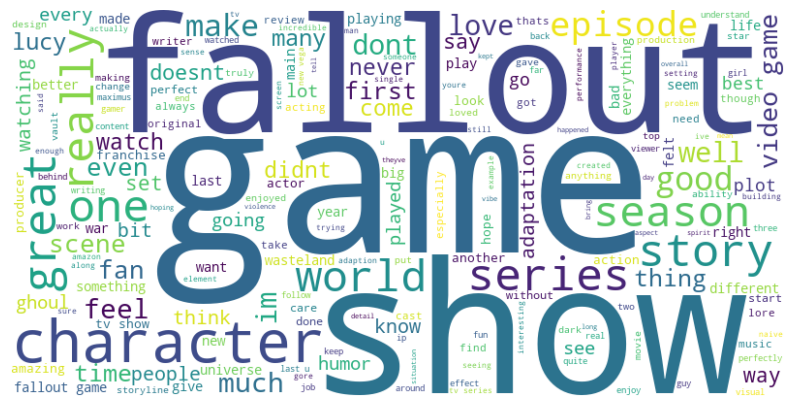

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the text data into a single string
all_text = ' '.join([text for text, label in data])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

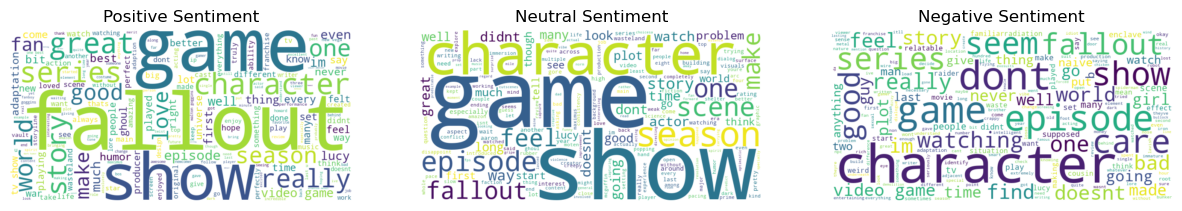

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'data' is a list of tuples containing text and sentiment label
# Example: data = [('I love this product', 'Positive'), ('This is okay', 'Neutral'), ('I hate this', 'Negative')]

# Generate word cloud for positive sentiment
positive_text = ' '.join([text for text, label in data if label == 'Positive'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Generate word cloud for neutral sentiment
neutral_text = ' '.join([text for text, label in data if label == 'Neutral'])
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

# Generate word cloud for negative sentiment
negative_text = ' '.join([text for text, label in data if label == 'Negative'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Display the word clouds
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Sentiment')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment')
plt.axis('off')

plt.show()


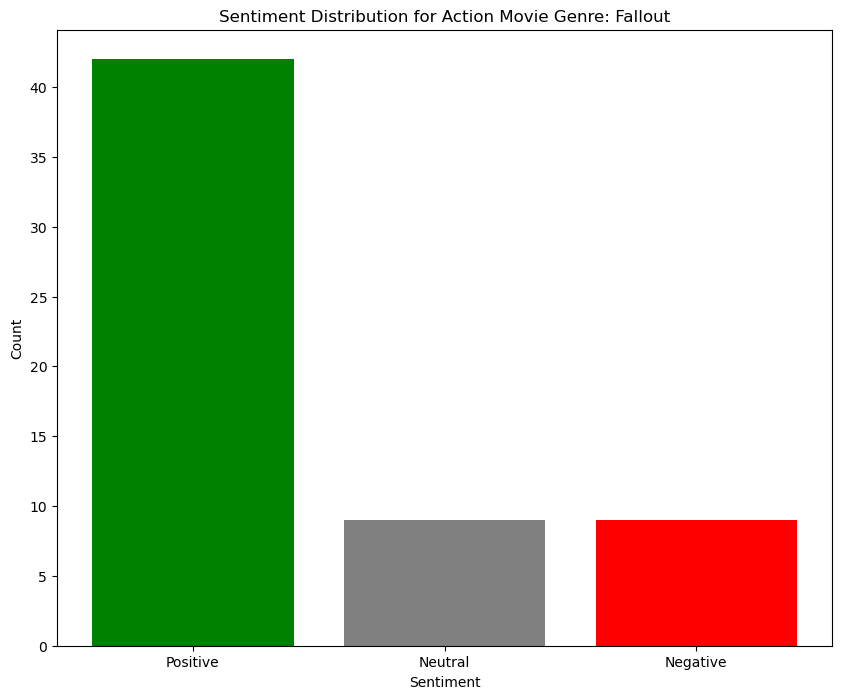

In [3]:
import matplotlib.pyplot as plt
from collections import Counter

# Original data
data = [
    ("excellent writing different bit piece connected bring satisfying ending good character development mystery etc honest didnt high expectation felt deep respect game wonderful dramaalso motivation andor situation various character quite complicated definitely wellmade adaption great cast entire cast felt point suitable amount humor right moment gory violent hell intriguing storyline many fun easter egg fan understood assignmenti wasnt fan ending enjoyed overall", 'Positive'),
    ("ive forced watch two episode writing review seriously gone wind like famous dont give da line episode create long lasting screwing chicken im sure go movie history mention demolition man review female character bullock ditzy naive chutzpah underneath exosuits used time b nose guy made think white michael jackson gamers put rating doesnt belong good special effect", 'Negative'),
    ("noseriouslythat wasnt rhetorical questionwhat show must confess managed put three episode atrocity could endure gave since seen anything bafflingly bad big mess disjointed cacophony passing content imbued drenched modern day ideological trope virtue signaling bereft anything resembling creativity originality importantly qualityi honestly dont care video game personal attachment ip marginally familiar lore approached show newbie prior expectation therefore looking series hoped would least entertaining containing good story interesting character none available quite oppositea waste time brain cell id like say feel iq dropping spend time thinking talking fallout", 'Negative'),
    ("fan fps game optimistic show read game creator involved doesnt disappoint regard capture spirit fallout quite well every aspect visuals prop music humor specially violence really feel like youre watching cutscenes new fallout game disappoints actual story character interesting general plot arc one completely predictable kept interest creative show dont tell moment funny surprise happened rather resolution plot could predict mile away great good show im looking forward season", 'Neutral'),
    ("think series good job telling completly new story without completly adapting original game visuals come pretty close great long time fan bethesda game series dialogje great cast great job putting life animated respective charakters definetly go onan rewatch soon im done writing reviewing one best orginial series year tell hope second seaso announced soon dont try pull te one otherwise would dissapointing", 'Positive'),
    ("want start saying never played video game series brother watching getting input incorporate theme detail character game great like halo series whatever wanted without following classic storyhowever quit watching episode find good grounded character extremely strange relatable lucy closest relatable character hope arrogant obtuse understand postapocalyptic series love last u followed character crappy situation well protagonist fallout bad people making question rooting hoping change greater good also many plot hole dont mean nitpicky example heck would check radiation wedding would robot give lucy finger harvest organ raider running away max crush one head suit many dont understand reasoning behind itanother problem everything sexual problem lucy saying incest cousin could unfortunately somewhat understandable situation would need show guy masturbating boot camp would change story scene also pregnant woman vault cousin dressing husband literally need scene uncomfortable plea weird fan fantasy incestthe ghoul good character written show opinion really disappointed especially hype sorry offended diehard series thought would put however", 'Negative'),
    ("ive reading one star review series felt bad behalf human race felt need write owni loved series long time fallout fan enjoyed every minute firstly attention detail incredible soundtrack random item table eg sugar bomb red rocket gas station pipboy clearly created collaboration fan extremely talented producersthe plot good theyve kept vault back story created one series great dovetail together nicely overall story arc like show pre post war world stitched together following ghoulif criticism would didnt really relate maximus im sure meant feel sorry grow like never really happened find cold cowardly uninspiringlucy hand great watching ongoing realisation world like seeing get progressively tougher without losing pure spirit great balancing act purnell nailed methere much fallout content show also much missing im pleased renewed second season im hoping content theyve hinted throughout series one make appearance also hope dont rush keep incredible attention detail pure fallout vibe given high theyve set bar itll painful ill wait mean make right", 'Positive'),
    ("played game tv adaptation felt like parody vibe akin mar attack stepford wiveswhile game occasionally humour would describe cheeky even dark tv adaptation plain silly immature goofy missing also sometimes scary aspect game well large lengthy action scene raider robot mutated human animal new building location game exciting unpredictable whereas tv series location repetitive scene dull goofythe acting direction actor mostly cartoonish sometimes inconsistently seriousdramatic script immature sexual dialogue feel place overall plot paper thin behaviour character unrealistic illogical relationship development nonexistent unbelievable hero found mission character stand behind root yes treasure sort everyone dont find last episode viewer doesnt know theyre supposed excited seems though main focus writer come plot twist last episode conscious low budget construct plodding filler episode first last pad irrelevant dialogue neglecting build lovable character story arcsconsidering rich world fallout game writer didnt seem care really go deep anything everything feel superficial real credit give production team went beyond faithfully recreate bring life art design game make really fun easter egg hunt shame tv series look like fallout doesnt feel like fallout", 'Negative'),
    ("didnt play game came knowing lore etc gamer reviewer seem havewhile visuals production amazing give real sense world setting im left wondering point admittedly never finished watching full season got ep realised didnt care character stopped maybe depth come second season wont watching find outi get itll appeal familiar franchise feel like majority watch knowing much background itll come across tedious watch", 'Negative'),
    ("fan fallout game yearsi nolow expectation going captured first episode great character twisted dark fallout humor love great cinematography work perfectlythis happens take best ip build upon perfect example make something fan making straight adaptationjonathan nolan worked love franchise amazing skill directing really showsone main writer show worked office u amongst thing think thats humor perfect least meand end shot let goo", 'Positive'),
    ("selfproclaimed og fan series watched one day certainly say deserves canon flaw would fallout didnt acting story visuals lore accuracy fallout feel idea video game adaptation top stay true original also forgetting new onesspoilerswarning ncr fanboys gone reduced atom warning bos fanboys goodytwoshoes like fallout warning vaulttec fanboys big surprise waiting", 'Positive'),
    ("last thing want rate show based something like bad review could mean cancellation star im seeing much disney influence story casting wouldve preferred first vault dweller male funny hey sex sell walter goggins scored one hell become household name playing ghoul many kid watch son justified diamond lol he bringing entertainment screen anyways didnt need another fin star war one good enough like cloned ha story personality another poor cry storm trooper anyways keep show going maybe itll get better season like halo", 'Positive'),
    ("series great watching made want play fallout game specially fallout new vega favorite mine scenery beautiful main character interesting time specially lucy vault dweller script engaging show thing whoever like game also enjoy series main reason wanted watch series jonathan nolan loved project person interest westworld good scifi series creatorsummarizing series worth watch worthy time check", 'Positive'),
    ("played fallout fully vega friend house say show captured fallout perfectly much add show season without overwhelming people already know season better mainly fallout universe lot material work could see super mutant deathclaws far story well done focusing think different character development crazy universe fallout left good space go many different direction season also enjoyed many different emotion took show mixed human element nicely comedy drama action slice life im looking forward season thats make adaptation", 'Positive'),
    ("hope series get another season never play game know bout bit piece lore thank video essay series entertaining well donethe story engaging simple yet amazingly well put violence violent top lot gruesome stuff made look away screen cringe like fit wasteland situation intheres editing error like splicing doesnt make sense put story enjoyed every minute kinda sad finish know next season outi like character lucy nice protagonist started someone quite naive upbringing become survivor without truly losing herselfi love ghoul character though reminded much character westworldi also love music retro aesthethic contrasted apocalypse always something enjoyed see fallout gamesalso big shout best girl doggo cx dogmeat amazing", 'Positive'),
    ("one best video game adaption date top line performance ella purnell hard belief shes two best adaption far absolutely loved arcane killed role great humor fallout like also dare say perfect performance supporting lead walton goggins ghoul tragic story character still come top badass wasteland aaron clifton lucy new brotherhood boyfriend bring much life show im excited season war war never change", 'Positive'),
    ("fallout tv series finally arrived disappoint moment iconic theme play immersed harsh yet strangely captivating wasteland fan franchise know love show masterfully blend dark humor gritty survival story bringing world fallout life way feel fresh faithful rootsthe casting spot actor embodying character unique trait complexity standout performance coupled sharp writing add depth already rich lore fallout universe narrative engaging clever twist intense moment keep edge seat episode explores different aspect wasteland politics various faction personal story survival betrayalvisually series triumph set design special effect authentically recreate retrofuturistic aesthetic game attention detail costume prop add extra layer immersion making feel though youre stepping right gameoverall fallout tv series brilliant adaptation stay true spirit original game introducing element make accessible newcomer whether youre longtime fan newcomer wasteland series mustwatch thrilling ride world despite despair decay always glimmer hope", 'Positive'),
    ("say best adaptation tv show video k ever seen say amazon decides disappointi one tends fall love tv show adaptation game one hit park thrilling fight quirky song nuance always make one come back morethe character building done really well show take character background give snippet past make come back moreover budget tv series one really well cgi costume dont feel fake", 'Positive'),
    ("following big boot last u twisted metal continues tradition amazing adaptation easily digestible fun newcomer alike wife especially know nothing video game fan love adaptation believe sign perfect product brother able geek tiny reference manage stuff every scene wife interested story new exciting location imagery show offer especially love cinematography shot skillfully planned executed thank another great wait find show go", 'Positive'),
    ("fan game think great also think fan tv boxsets treat flaw post apocalyptic usa green tree care good show great character surprised handled ella purnells character wasnt girl bos like show awesome vault dweller used initiative survive like game walton goggins stole show ghoul filli episode awesome bos ok cant wait see series brings vega strip end made want start playing new vega thought great showrunners chose completely different path game good effort solid start series hope stick around long time deathclaws coming", 'Positive'),
    ("tried really tried watched first two episode fell asleep middle one bode well compelling nature showi see theyve spent huge amount money complicated set certainly lavish productionbut never played game mean could see certain element obviously storyboarded right video game npc nature number character clear enough supposed care npc dont know really care character girl naive girl incestuous relation cousin im supposed root cowboy ghostzombie whatever supposed care dont identify character dont care characterslook start theyve bomb shelter long time okay radiation bad okay decide theyre going trade marriage adjacent enclave okay everybody seems geiger counter wrist yet door open adjacent enclave one check mean world filled radiation would think would number one thing open door doesnt seem smart doesnt make anyone enclave seem intelligent make seem like idiot die like idiotsdo think im going identify idiot root sorely mistakenand naive girl decides shes going go alone big bad dont know find lassie father whateveri really dont carewhen watched spiderman tobey maguires character similarly naive also smart made intelligent move made blunder learned character seemed growin show real sense here character character b character b say something character character b leave character go character c say something go girl loses eye necessary plot would story different never lost eye guy loses foot necessary plot story different never lost foot seeing thiscontinuing spiderman comparison peter parker made bad selfish call paid life uncle ben made difference character story see consciously making effort make better choicesi didnt get sense showheres guy he going steal iron man suit another guy cant fly well flying look much like man wire one point cgi slipped actually saw wire little bit wasnt good money spent set im surprised went cheap flying effect robert downey well iron man youre going meet standard dont show flyingtheres difference playing video game watching movie maybe havent noticed friend arent terribly entertained watching play video game making movie essentially watching someone play video game good pathanyhow two episode enough wont backits bad production anything quite lavish term set want character emotion thing identify normal element successful show wont find", 'Negative'),
    ("first heard game going adapted liveaction disappointed news dreading result watching series glad say wrong cant complain really would nitpicking believe show well done could watched anyone never played game dive right get hooked amazing worldi love way film give different perspective world doesnt follow one person point view lead character lucy great representation player play fallout first time due naive innocent beginning true game shes met hard decision evolve character", 'Positive'),
    ("glad didnt go bloodless disney route stayed true game played probably hour fallout even person hour would love love dropped binge weekend yeehawthe costume language weirdness culture many element game brought screen beautifully wish make fallout fear time like truth play game wishing survivor mode okay im filling character get minimum almost enjoy show", 'Positive'),
    ("ever since show announced waiting love bethesda game grew playing skyrim never tried fallout man show amazing start till end tying plot giving every character purpose trio linear story get tied several twist turn ghoul best lucy amazing actor played lucy perfectly executed role lucy reaction several surface stuff shes seeing first time get soo surprised yet shes eager find dad without giving great development regular apprentice soldier sword nd command literal legion army faction called brotherhood steel twist turn leading great finale show past present bomb dropped fallout done could content even tho already entertaining made want dystopian world started playing game enjoying every bit waiting second season cheer", 'Positive'),
    ("experience fallout year playing game fallout new vega game brought franchise set state show california also featured prominently fallout lore wise apocalypse right choice showrunners producer place los angeles california graham wagner geneva robertsondworet served showrunners show penning script episode couple writer deserves praise kieran fitzgerald chaz hawkins gursimran sandhu creator crew behind tv show respected source material game even todd howard aboard producer along jonathan nolan lisa joy nolan directing first three episode thus setting tone whats come like michael mann tokyo vice example notable director clare kilner frederick e toye along wayne yip directed finale people created something truly special perfect would call one best adaptation video game original story set universe something last u halo never writer producer fallout could played safe done something similar would free rein anything wanted without need involving game lore behind truly nailed attention detail set design world building overall production design everything placed scene truly incredible miseenscene director visually fallout spectacular incredible cinematography gorgeous looking visual effect combined practical effect makeup prosthetics ghoul example along set built show like red rocket superduper mart come mind cinematographer worked showseason stuart dryburgh helmed four teodoro maniaci helmed four think dryburghs cinematography best resume piano pilot episode boardwalk empire painted veil speaks hell probably get nominated fallout maniaci also incredible creating iconic shot last two episodesthe show depicts aftermath great war apocalyptic nuclear exchange alternate history earth advance nuclear technology wwii led emergence retrofuturistic society subsequent resource war flashforward tv adaptation follows young woman named lucy leaf behind home vault venture dangerously unforgiving wasteland devastated los angeles look father along way meet brotherhood steel squire ghoul bounty hunter mysterious past agenda settleoriginal fallout lead tim cain appreciated performance storytelling singled show nailed fallout vibe biggest achievement looking prop said one scene realized minute went followed dialogue engrossed visually couldnt agree hearing one creator original fallout game make smile performance storytelling truly highlight comedic tone combined ultraviolence handled perfectly close game show also serious tone important thing everything felt natural never strange viewer eye storytelling overall writing narrative completely right tv show u follow vault dweller perfectly cast three dimensional character right ella purnell lucy maclean squire maximus brotherhood steel also great character well cast played aaron moten walton goggins ghoul cooper howard great three dimensional antagonist cross morally grey multiple occasion thus becoming protagonist right thats big three story deuteragonists also there also big mystery surrounding seasonshow took lucy father destroyed shady sand along howard hunted every faction bounty hunter escaping enclave something valuable meanwhile there another story flashback exactly show ghoul back bomb hit cooper howard timeline wise far anything seen brilliantly executed way didnt hurt pacing made better tie main story stellar main cast character impossible like supporting cast guest star also great name like sarita choudhury leslie uggams matt berry chris parnell michael cristoferthe final episode tie everything together nicely timeline well everything come full circle said episode twist lot knowledge lore lot thing werent shock show big twist unexpected brilliant writer showrunners deserve lot praise last episode whole show faithfulness source material succeeding telling story vast universe would nice would released weekly episode get savor every minute episode day would felt special instead got eight episode honestly happy deep miss whole weekly release socializing come fallout getting second season im stay im giving first season thumb spectacular season television possibly best time ive watching tv series long time multi genre show fallout perfectly nailing genre simply spectacular season television", 'Positive'),
    ("actually incredibly good show good solid storyline keep viewer entertained engaged said really kind hate show movie whole retro future type thing really kind annoys sens im pretty much future futuristic time still show nice enough gore keep people satisfied real world challengesif world post apocalypticpost war kind way writer excellent job telling fallout story actor played theyre part brilliantly cheeky acting role actor done pretty well dark comedy enough gut mayhem good melody jump seat action huge expensive explosionthat like good cinema", 'Positive'),
    ("people leaving negative review thisgood grief must hate everything show fun gory hilarious completely engagingthe character great setting immersive storyline compelling love gave backstory vaulttec character someone really enjoyed playing fallout total treat may bold probably best video game adaptation dateand thats coming someone really loved last ussit back snack cram sugar bomb pop top nuka cola enjoy fun showbravo", 'Positive'),
    ("considering terrible producer regularly crush dream star trek star war fan established intellectual property refreshing see ip ton merit getting produced individual understand jobfallout legendary video game franchise fallout fallout new vega top time video game fallout three like gta iii changed industry gamers provided interactive bliss game one could sink hour remarkable single player experience fallout fallout turn based strategy game established ton lore item idea carried forward fallout third person action game third person action game role playing game strategy game element also incorporated design gamers given ton customization building character aesthetically applied perk ability leveling beauty fallout player could really tailor character ability exactly want included physical ability improved use tool weapon intelligence ability like hacking charisma ability better communication deception single play ability could player pick choose ability round characterthats lot bottom line great game fallout franchise ton merit draw record would say thing monster hunter franchise mh movie god awful train wreck intelligent production come need producer understand take make good television also understand source ip know draw merit ip modern era seems like many producer think take existing ip whatever heck want change fundamental insert outside content nothing original ip worst yet use existing ip float messaging insipid ideasnot fallout fallout producer hired right people let work wonder ever define parameter producer able simply get way let chosen talent job however unfolded end result borderline masterpiecefallout tv show future world never grew style aesthetic mix retro aesthetic science fiction future post apocalyptic wasteland make great playground inject character narrative exactly happens fallout single main character basically three main character story arc arc intersect unfolds across aaa episode second season already authorizedwhile show unfolds easily digested manner story quite complex backstory character im sure many attempted summery recommend watching show one episode probably enough fully commit doubt definitely watch least three complete episode kinda like anime deciding show fallout lot highly stylized violence often humor involved effect really technical quality top notch one better season tv genre last year best got early seasonsif cant tell loved first season fallout also get going ax grind producer selfishly attempt ruin existing intellectual property dubious reason know simple understanding loving video game make good tv producer also understand medium pick choose merit genre make something goodbut great rare gem gamers know bethesda company behind fallout struggling last year video game release last great game fallout even fell short fallout nv opinion fallout came year ago long time great release hope fallout tv show reach mass medium audience provides influx resource interest bethesda need make great video game future even doesnt happen show done right multiple season could greatest thing come publisher astonishing possibility", 'Positive'),
    ("say idea storyline game started watching fallout mainly good review disappoint known many tv show movie made video game lot case pretty bad one really blew mind one best tv show watched time honest watch lot em quite surprised story known know interpretation couldve disaster handled really well might actually play game one haha", 'Positive'),
    ("introduce many thing world still really explaining single one first episode set tone rest series threw many concept fallout universe viewer face without even taking two second elaboratewhat bunker build people get brother steel care metal giant enclave raider happened bunker get question may answered later dont feel like continuing even single thing properly established one hour", 'Negative'),
    ("fallout testament fact video game adaptation indeed deliver mature compelling content par acclaimed television series like hbos last u another game adaptationthe series ability appeal gaming enthusiast newcomer alike even youve never picked controller richly developed character intricately woven plotlines draw effortlessly series doesnt rely solely gaming root carry forward instead stand confidently merit offering fresh immersive experience viewersthe casting choice spoton breathing life character fan fallout franchise come love new viewer instantly connect ella purnells portrayal lucy maclean nothing short captivating bringing depth resilience character navigates harsh reality wasteland aaron moten maximus squire brotherhood steel delivers performance filled strength vulnerability showcasing complexity survival world ravaged nuclear fallout walton goggins ghoulcooper howard scenestealer infusing series charisma mystery would keep viewer edge seatsits shining example game adaptation justice source material also transcend carving place pantheon great televisionin conclusion youre looking riveting series seamlessly blend action drama thoughtprovoking theme look amazon prime fallout next potential game adaptation couldnt agree series based bioshock would absolute dream come true here hoping someone listening ready bring rapture life small screen", 'Positive'),
    ("set vibe great job capturing essence fallout ghoul norm carrying show back opinion show great scene room improvement writing directing acting actor choicesa major gripe mine pacing many scene example one many scene episode eight lucy dad asking go home lasted way long get shes devastated isnt sure scene didnt need dragged get point across awkwardly long scene cost dramatic effect trying achieve also timing dialog character bungled time time instance thaddeuss dialog felt awkward seemed actor hasnt performed day life immersion breakinganother immersion breaking constant aaron moten maximus main character given least amount backstory season character come childish inept turn scene lucy character putting actor deciding scene scene he going play character come across lacking consistency unable tell aaron bad actor show need better directorsfight scene clunky time injected humor scene didnt come across way think show intended let slidehowever overall feel good job would like see go season", 'Neutral'),
    ("definitely best video game series dont know impression work make people familiar world fallout old connoisseur universe liked almost everythingobviously test season based result clear whether sequel filmed sure quite fallout world many readymade scenario could make season shelter story alonethe story classic series game something someone kidnapped main character set journey full danger adventure greeted classiclooking shelter power armor pipboy red rocket ghoul much moreand course bloody mess perkenjoy traveler end remember war never change", 'Positive'),
    ("gave show chance saw multiple video popping youtube channel watch occasionally claiming show actually good didnt really watch video didnt want story spoiled go unbiased possible last fallout game fallout way year ago experience source material recenti watched first episode mildly entertained brutality gore somewhat reflects see game well head limb exploding severely injured there also several slow motion scene similar game autoaim functionality target specific body partsthe world also look like fallout far tell postapocalyptic wasteland shabby settlement trying survive raider brotherhood steel vault outfit background accuratethe problem start look writing character though whole lot doesnt really make sense work viewer well character arent actually asking relevant question soon mind start working though question pop certain aspect story completely fall apart multiple faction conflict among conflict exist though youll get shrug couldnt figure especially last episode big showdown start problem also way many character one faction go along killing random people even though supposed kind honorable doesnt make sensethe season also open end leaving lot question table season one hand good overarching storyline throughout season hand ending season unsatisfying either watch season youre left mess doesnt deserve high rating opinionfinally something also bothered pacing episode wildly jumping around time slows snail pace obvious filler content time jump around place rapid pace especially last episode one character suddenly popping middle battle zone like wait get unnoticed feel many aspect resulting sometimes boring others slightly overwhelmed event happening definitely lack consistency", 'Neutral'),
    ("amazing show everything beautifully written character intriguing plot captivating episode enough make full season long wait season year another episode idkseems like lot build disappointed long wait half seasonnow obligatory gibberish make character requirement lalalalalalalalalalalallalalalalamalamamamamlalalalalamalamamlalalalalalalalalalalalallalalalalalalalalalalslsmsmeijskskakakakkalalalalalalalalalalalalalalaaamamamsm", 'Neutral'),
    ("potential great diasatopian vibe start wooden acting poor sfx ridiculous storyline utter load gibberish written year old vivid imagination dont waste timethey add odd bit ultra violence dramatic effect fails deliver character non relatable care non load critical stuff explained incoherent stick game adaptation waste time watchgot episode gave painful watch weird year old zombie nose doesnt seem get hurt crappy metal space marine dick innocent girl who lived tin life suddenly bear grylls weird tacky poorly executed avoid", 'Negative'),
    ("say wow great adaptation fallout world fallout game particularly fallout new vega favourite game time news broke show released excited nervousbut let clear upthis wonderful watch fan applaud team behind show welcome season open arm everything sound pip boy make stimpak sound heavy footed sound bos got better better walter goggins excellent truly masterpiece feel proud game love excellent show accompany", 'Positive'),
    ("almost finished annoyed review fari hate blindly praise say nothing like game going assume loosely familiar franchise seems pretty close world expecting feel pretty close fallout mindi also dont love itthe closest negative review comment graphic graphic rough spot isnt problemthe problem pacingvery quickly introduced mcguffin well handled first couple episode present solid way disappears say around episode around episode introduced much needed background world like part wellso liked problemthey different story season first four great season second four also great make clear arcsthis feel like trying emulate game introduction part game like game stuck railroad storytelling introduces mcgufffin something happens world open upsome player grind mcguffin keep going player wander explore creepy building personally explore creepy building enjoy enjoyed second act unsatisfied reached end six realized going able finish one two story arc time remainingohyay another cliffhanger guess saw coming least dont get wrong understand need didnt stick landing episode segment roughi problem genuinely episodic show problem major story driven show masterclass genius get cake eat", 'Neutral'),
    ("show interesting outstanding acting visuals awesome reminds little silo pacing nicefor thing dont like think devalues everything humor humor stupid absurd make everything le dramatic le serious le intense hoping show scary dark intense like last u stupidity humor brings really put feel like ruin execution scene plot like making fun little exhausting watch think another excellent video game adaptationside note yes played game favorite mine dont think humor show humor game game felt serious thats experienceall dont want miss one", 'Positive'),
    ("went low expectation pleased see fun engaging especially happy see didnt make lucy another mary suehowever watched whole season feel let bar writing especially area character motivation without going detail might cause spoiler would say ending absolutely fiddle timeline canon game despite show creator said making unrelated original story official worldbut said think worth watch dont think much dark humour game retrofuturistic look mostly anyway certainly kept watching way", 'Neutral'),
    ("got high production value good visuals main actor decent many thing like script terrible character one dimensional top action sequence worse bad tv series gore like rubber era much like rubber era kind like robocop total recall dumberthe character setting look like kid show gore dark setting doesnt make senseon top there lack chemistry among cast actor thing explicitly tell feel timei guess amazon prime like make garbage content couldve great joynolan made like first season westworld look like told dumb way", 'Neutral'),
    ("love fallout game series playing decade love postapocalyptic world love back story glimpse past ive always said fallout world would make great movie tv show past indication would game justice except series blown away attention detail like mirrored game screen felt like playing another iteration favorite franchise story bit slow beginning quickly picked pace love bit humor thrown like game also equally dystopian glory would love inon zurs original music game taste would love hear positive feedback confident get picked season keep em coming love", 'Positive'),
    ("masterpiece dont miss give solid background song music awesomethe background music top notch best game adaptionthe dilogue okiea docky really loved diloguescreen playworld exploration people mind set wasteland experience everything awesome perfect web seriesiam really loved heroine character beautiful woman expression loveablecharacter developement good first time see negative seariseghoul character design really good important given searise comparatively protagonisti started watching second time searisereagionl language dubbing also awesome local bad word really enjoyable 😂", 'Positive'),
    ("im even finished final episode left first season still say amazing producer show creator perfect job bringing world fallout life truly felt joy watching show felt first played fallout stayed true world gave u wouldve wanted decision making picked good cast goggins purnell absolutely killed role exciting ride perfect touch comedy necessary got ta say turned much better probably couldve imagined would im excited see season", 'Positive'),
    ("like many grown tired tedious idea repeated trying please everyone please one boring entertainment last year happened story happened art gut glory friend show prof soul actually feel like people created show understand gaming franchise audience arent collecting check feel like cared put thought much girl meet outside world type show multilayered way isnt overdone confusing people seem like real flawed individual different agenda backstories flesh character lore extensive look amazing costume great acting great especially leading lady course always amazing walton theme incredibly relevant explored perfection preaching u telling u story showing u multifaceted individual humanity people good bad dichotomy might night even exist show give hope really untapped talent still waiting uncovered writer director producer care hope serf wake call giving u nonsense last year real", 'Positive'),
    ("sceptical first hard capture gameplay tv although show fantastic felt like immersed right world fallout recognisable landmark story entity doesnt follow game story line way love give writer ability free reign introduce new character mix storyline great kept wanting sadly binge watched im hoping season one highly anticipated watch recommend show anyone even arent fallout game player", 'Positive'),
    ("didnt really know expect one played hour various game since got sale really know much cast walton goggins great actorthe story well explained cohesive really brought element game dark humor music npc interaction created wonderful immersion fantasyland new california republic item weapon recreated glory stayed true game pushing boundary find backstory ghoul bit dull dragged taking huge portion show part didnt want really watch however worth past tied present action rewatch would absolutely skip ghoul backstory sorry waltonthe one big issue show armor part visibly wobbly well refined scene despite iconic part universe like open armor circular opening hatch jiggled could edited like wobby lightsabre flaccid millennium falcon star war come show catch attention well dark humor ever prevalent game perhaps even better would equivalent last u except lucy doesnt exist game jonathan nolan really able push bound new vault storyline best thing never felt like mission mission flowed well lucy story unfolding inside vault piece together big picture apocalypse started chaos happening vaultsin case loved every bit lucy journey post apocalyptic world vastly different every iteration tvmovies today twd last u z nation etc making refreshing change pace humor great story hint thing happened happening world touched game couldnt really get game slow dull finished show day got towards end ready finished lucy mission created world much happening vault globe could different story review plenty speak cant wait next season spinoffs universe offer", 'Positive'),
    ("whole pieace joy immersion world one one thanks lot truly match world fallout even skiming surface hollywood kandy picture frame perfect director create support incrediable costume gineus doubt cool watch see flaivour coulor also spirit enviroment perfect smell digital world applause admiration hard work theyve done asume thank thank much many reffers original item game purpose match reason discus truly adoptaition game screen ever thank actor castand staff youre best", 'Positive'),
    ("im currently episode started praying hoping amazon ruin fallout surprise like far falloutive played fallout game seeing gore bos yao guai giant cockroach ghoul first episode make want reinstall fallout game play even bobbleheads made smilethey couldve ruined fallout kept fallout weapon laser rifle automated turret assaultron even codsworth well kindaamazon kept every detail according game thats show good follow fallout storyline following trying recreate story exactly wouldve messed thing something new like", 'Positive'),
    ("fallout game fan indicated series incredible recreation everyting game character vibe music costume prop gritty survive cost nature wasteland contrasting safe organized valutswhat impressed wife gamer doesnt like science fiction historical setting knew nothing fallout really enjoyed series although violence bit much time say lot well character dialogue plot created evolved seriescongratulations amazon investing series delivering everyones expectationscant wait season", 'Positive'),
    ("fallout seems thing turning around video game adaption fallout manages take silly gruesome complex chaotic world fallout game turn compelling tv show small feat anything amount switching tone show couldve gone much worsebut delicate balance funny silly awkward gruesome make one unique show whileas big fallout fan especially new vega set low bar going pull massive world weird one jonathan nolan behind gave hope goggins help always still gave low chance succes behold surprise binged couple day genuinely good show took adjustingprimarily lean silly much foundation art direction tone voice lie fallout game mainly bit silly fallout nv general bit serious gritty depressing worldsdirecting great far bad memory westworld action scene especially later season nolan good always hilarious bullet fest stood awkward contrast rest show fallout first firefights action scene perfectly good bit silliness work universe set inand take bit needed adjust aspect video game tv show play video game rule lot comically unrealistic scene whilst exceptionally gruesome gorey therefore might best video game tv show adaption ever trying real life trying ground reality creating fictious world fictious rule align perfectly fictitious rule game gaming general needed accept really enjoying itmusic pretty perfect expected score effective used sure oldie music really land show put right inside fallout universe could sing heart fact actual music also hear game icing cakethe story great way show diverse huge world fallout weve yet touched surface much explore gave taste could go good whilelorewise minor change mostly creative choice certain attitude portrayal made sense none stuck betraying game term thing work bos bit le cool incompetent division entire thing easy look pastalso gore man went love fallout game gorey dont stray one bit thats show honest game extend ive never seen beforethe pacing move along fast character fast travel didnt love much coincidental nature made world feel small compact everyone seems meet around random corner every odd episode anything thats complaint far world feel somewhat small everything around tends feel like set dressing quicklythat said season really delivered good time cant wait", 'Positive'),
    ("im big fan fallout series favorite fallout game unpopular fallout great environmental storytelling gamers capable noticebut series brainer meits bit much designed game like series lucy literally first scene set character sheet describing skill example within episode always sort sidequest implementednevertheless manage merge main story much better game ever didmaybe todd howard profit work show runner learns design story better gamesmy favorite guess people favorite ghoul character walton gogginsthis character give series depth perspective always interesting story arc going also used character describes world reason came worldwhile lucy fish water character maximus anti hero managed give series various perspective charactersthe world design super great adapted game fan game knowing every single object even location naturally build world try create new interpretation fallout throw fan service yes go disney star warsthe dark humor explicit violence also fitting although humor might putting non fallout fan general people issue dark sense humoreven though show runner claim message series forget word fallout message thats anticapitalistic also critical society even intended perfectly carried gamesthere thing like plot convenience used throughout series even plot armor real gravitas character resolved many scene totally stupid solution game die think one best game adaption last u great basically game without interactivity fallout take spirit game creates great showi looking forward next season although careful expectation show runner westworld wrote grave", 'Positive'),
    ("good loved little detail excited didnt assume anything able enjoy show fantastic humor story curiosity creates phenomenal many character story told within show im someone get stuck one video game year fallout one game say know every detail mean show absolutely follows detail enjoyed intensity show also brought well introduction raider fantastic realized like way awesome", 'Positive'),
    ("fallout go done one best best game adaption screen bingeworthy confection even unfamiliar game enjoy aesthetic future envisioned perspectivegoggins purnell shine respective role purnell bringing surprising comedic naivete performance goggins perfection essentially playing two character though personfallout interesting cameo season prime went show production value top notch movie level humor dark well timed id say best thing amazon fallout really capture feel atmosphere spirit original game im excited season full expect", 'Positive'),
    ("ive massive fan game put hundred hundred hour im familiar quirky world sometimes dark character situation game also violent seriously people find level absurd gore ultraviolence entertaining disturbed individual maker show want boy cant fallout youve already got extremely popular highly beloved franchise incredibly rich world play show could incredible take special people turn sure thing garbage", 'Negative'),
    ("latest muchpublicized science fiction blockbuster series fallout streaming prime freevee without ad respectively amazon star ella purnell lucy maclean walter coggins mutant bandit ghoul aaron moten love interest maximus getting high rating imdb would rate barely watchable plot vaulttec manufacturer fallout shelter conspired powerful interest start nuclear war order drive customer shelter year later surface inhabited warring remnant humanity well mutated monster series based popular video game feel juvenile one might therefore expect spite multimillion dollar production much science fiction one couple step zombie apocalypse film sort plot hole eg surface obliterated back stone age electricity seems working every abandoned building hightech weaponry proliferates character stereotyped inauthentic also wearied combining ultraviolent visuals retro nostalgic singing watch eight episode think one must scifi gaming addict", 'Neutral'),
    ("fallout one first game ever played every single one im huge fanboy cant believe fanatic giving low rating lol expecting something worse honest minor setback surely ignored even newcomer really enjoy fun show yes newcomer universe lot take first glance really really overwhelming show make good job ease later start war war never change explain state world viewer digest episode really explains lot expecially vault tec political social ethical spects universe episode series done explaining minute jump action goofy cheesy doesnt take seriously like game acting great even though prepared hate lucy didnt lol goggins delight watch always maximus amazing character plenty room grow music unbelievable design oscar worthy great production really capture life vault come little bit short come westlands become better hope screw fanatic fanboys really enjoy beauty", 'Positive'),
    ("never written review show since would considered og game series ive waiting year year show finally got one im stoked season seeing new vega gave rush expect see house boomer caesar legion great khan king id like see institute railroad eventually thats whats great series possibility endless fo series set tide turning action drama situation also great corky weird scenario character give missing ingredient dark humor comedy general love bringing wasteland life love follow different character continue raise bar drop jaw hopefully begin see game adapted show movie kinda every gamer want gamegenre wish looking forward seeing fallout merch gamesgame apps available also there way miss right pure gold struck", 'Positive'),
    ("dont even know begin fact rating blow mind obviously im assuming voted people never played game wasteland weak enclave weak death claw pretty cool ill give life wasteland doesnt translate game show feel like going change much shouldnt tried follow story line make new path instead watching would suggest redownloading game dont still replaying far better experience conclusion show hurting inside im sad waited long watch", 'Neutral'),
    ("wouldnt even know videogame adaptation good setting culturally relevant good acting noncliched guy actually hit hand really hope get season hopefully retain writer nobody ruin walton goggins og man guy never fails make room interesting matter big set two kid playing main solid story romance acting way maximus play wounded struggling continue absolutely terrific facial expression top class vault dweller chick playing naive pure hearted chick guy fall love well played continue season dont screw ty", 'Positive')
    ]

# Extract labels from data
labels = [label for _, label in data]

# Count occurrences of each label
label_counts = Counter(labels)

# Define the order of sentiments
ordered_labels = ['Positive', 'Neutral', 'Negative']

# Plotting the bar chart
plt.figure(figsize=(10, 8))
plt.bar(ordered_labels, [label_counts[label] for label in ordered_labels], color=['green', 'grey', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for Action Movie Genre: Fallout')
plt.show()


### Performance Comparison

1.	Lexicon-based Approach (VADER):

Accuracy: 0.722

Classification Report:

•	Precision: Negative (0.67), Neutral (0.50), Positive (0.76)

•	Recall: Negative (0.22), Neutral (0.11), Positive (1.00)

•	F1-Score: Negative (0.33), Neutral (0.18), Positive (0.87)


Discussion:



•	The VADER lexicon-based approach shows high precision for positive sentiment (0.76) and moderate precision for negative sentiment (0.67). However, it struggles significantly with neutral sentiment (precision 0.50).

•	The recall for positive sentiment is very high (1.00), meaning it correctly identifies almost all positive reviews. Conversely, it performs poorly in recalling negative (0.22) and neutral (0.11) sentiments.

•	The f1-score for positive sentiment is the highest (0.87), indicating strong performance, while it is much lower for negative (0.33) and neutral (0.18) sentiments.


Limitation: 

•   The lexicon-based approach relies on predefined word lists, which may not capture domain-specific language or context, leading to lower performance on neutral and negative sentiments.


2.	Lexicon-based Approach (TextBlob):

•	Accuracy: 0.73

•	Classification Report:

•	Precision: Negative (0.60), Neutral (0.00), Positive (0.75)

•	Recall: Negative (0.33), Neutral (0.00), Positive (0.98)

•	F1-Score: Negative (0.43), Neutral (0.00), Positive (0.85)

Discussion:

•	TextBlob shows high precision for positive sentiment (0.75) and moderate precision for negative sentiment (0.60). It completely fails to capture neutral sentiment (precision 0.00).

•	It has high recall for positive sentiment (0.98), indicating it correctly identifies most positive reviews, but performs poorly in recalling negative (0.33) and neutral (0.00) sentiments.

•	The f1-score for positive sentiment is strong (0.85), while it is much lower for negative (0.43) and non-existent for neutral (0.00) sentiments.


Limitation:

•	TextBlob performs better than VADER in terms of accuracy but still struggles significantly with neutral sentiments, indicating difficulty in distinguishing subtle sentiments.


3.	Naive Bayes:
    
•	Accuracy: 0.699

•	Classification Report:

•	Precision: Negative (0.00), Neutral (0.00), Positive (0.70)

•	Recall: Negative (0.00), Neutral (0.00), Positive (1.00)

•	F1-Score: Negative (0.00), Neutral (0.00), Positive (0.82)


Discussion:

•	Naive Bayes shows good precision for positive sentiment (0.70) but fails completely for negative (0.00) and neutral (0.00) sentiments.

•	It has perfect recall for positive sentiment (1.00), meaning it correctly identifies all positive reviews but fails to recall any negative or neutral sentiments.

•	The f1-score is high for positive sentiment (0.82) but zero for negative and neutral sentiments.


Limitation: 

•	Naive Bayes can learn from data, capturing more varied patterns than lexicon-based approaches, but it struggles with precision on negative and neutral sentiments.



4.	SVM:

•	Accuracy: 0.780

•	Classification Report:

•	Precision: Negative (0.75), Neutral (0.60), Positive (0.80)

•	Recall: Negative (0.41), Neutral (0.26), Positive (0.97)

•	F1-Score: Negative (0.53), Neutral (0.37), Positive (0.88)


Discussion:

•	SVM has the highest precision for positive sentiment (0.80), moderate precision for negative (0.75), and neutral (0.60) sentiments.

•	It shows high recall for positive sentiment (0.97), but lower recall for negative (0.41) and neutral (0.26) sentiments.

•	The f1-score for positive sentiment is strong (0.88), indicating good performance, while it is moderate for negative (0.53) and lower for neutral (0.37) sentiments.

Strength:

•	SVM provides the best performance among the approaches, excelling due to its ability to find optimal boundaries between different sentiment classes and handle complex patterns in the data.


### Conclusion

In conclusion, SVM is the most accurate approach for sentiment analysis, showing the highest accuracy and a balanced performance across different sentiment classes. It is followed by Naive Bayes, which performs well for positive sentiments but struggles with negative and neutral sentiments. Lexicon-based approaches, such as VADER and TextBlob, are less effective due to their limitations in handling domain-specific language and context.
In the context of movie reviews, especially for the action genre, reviews can be challenging because they often use complex narratives and unique vocabulary. These reviews express a wide range of emotions and require careful understanding of context. Machine learning models like SVM are better at capturing these nuances compared to basic word-based methods, making them more accurate for analyzing sentiment in action movie reviews.
